# Objetivos

1. Reconocer que tipo de vela hammer tiene mayor probabilidad de renta, considerando las siguientes variables:
    -  Tipo de vela: Compra o venta.
    -  Tipo de hammer: Normal o invertido.
    -  Par.
    -  Temporalidad.
2. Considerando lo anterior; se hará una selección de los mejores pares y contextos, donde se obtendrán estádisticas tales como:
    - Probabilidad de acierto y error para cada vela.
    - La ganancia y la perdida promedio para cada vela.
    - Duracion promedio de la perdida y la ganancia para cada vela.
    -
    

# Carga de datos:

Se importan los datos almacenados en el archivo `forex_dataset.xlsx`.



In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st

In [8]:
# Carga datos desde un archivo Excel
datos = pd.read_csv('datos/resultado/forex_dataset.csv')

In [3]:
datos

,Unnamed: 0,fecha,par,temporalidad,tipo_hammer,tipo_vela,apertura,maximo,minimo,cierre,...,s3_minimo,s3_cierre,s4_apertura,s4_maximo,s4_minimo,s4_cierre,s5_apertura,s5_maximo,s5_minimo,s5_cierre
0,0,2008-06-18 00:00:00,EURUSD,D1,Hammer,compra,1.55156,1.55513,1.54598,1.55430,...,1.54661,1.55202,1.55192,1.56216,1.54876,1.55720,1.55731,1.56872,1.55335,1.56626
1,1,2008-07-15 00:00:00,EURUSD,D1,Hammer invertido,compra,1.58888,1.60389,1.58643,1.59150,...,1.58035,1.58448,1.58424,1.59313,1.58296,1.59103,1.59130,1.59442,1.57536,1.57772
2,2,2008-08-01 00:00:00,EURUSD,D1,Hammer,venta,1.55825,1.55886,1.55142,1.55609,...,1.53956,1.54195,1.54205,1.55019,1.53068,1.53109,1.53117,1.53128,1.49930,1.50032
3,3,2008-09-03 00:00:00,EURUSD,D1,Hammer,compra,1.44866,1.45219,1.43811,1.45129,...,1.40516,1.41330,1.41335,1.42267,1.40435,1.40919,1.40922,1.41796,1.39332,1.39359
4,4,2008-10-07 00:00:00,EURUSD,D1,Hammer invertido,compra,1.35150,1.37425,1.34815,1.35700,...,1.32592,1.34091,1.35969,1.36795,1.34498,1.36528,1.36540,1.37639,1.35585,1.35616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285936,285936,2024-04-25 15:25:00,USDJPY,M5,Hammer,venta,155.52800,155.52900,155.50900,155.52200,...,155.51600,155.53500,155.53600,155.55500,155.53100,155.54100,155.54200,155.54700,155.53300,155.54400
285937,285937,2024-04-25 16:05:00,USDJPY,M5,Hammer invertido,venta,155.52500,155.54100,155.52000,155.52100,...,155.56700,155.58700,155.58700,155.58700,155.52900,155.53300,155.53400,155.54700,155.52300,155.54400
285938,285938,2024-04-25 17:40:00,USDJPY,M5,Hammer invertido,compra,155.57000,155.59200,155.56800,155.57700,...,155.56100,155.56400,155.56400,155.58800,155.56300,155.58500,155.58500,155.58900,155.54300,155.54300
285939,285939,2024-04-25 21:35:00,USDJPY,M5,Hammer,venta,155.59400,155.59700,155.50800,155.56800,...,155.55900,155.58600,155.58500,155.59100,155.56100,155.57000,155.57800,155.61300,155.55700,155.56000


# 1. Agrupación de datos por categoría.

Variables importantes para considerar como categoría:
- par
- temporalidad
- tipo_hammer
- tipo_vela



In [9]:
lista_pares: list[str] = datos['par'].unique()
tipo_vela: list[str] = ['venta', 'compra']
tipo_hammer: list[str] = ['Hammer invertido', 'Hammer']
tipo_sub: list[str] = [f's{i}' for i in range(1, 6)]

Se procederá a construir una estructura de datos en forma de diccionario para almacenar información relacionada con pares de divisas, tipos de vela y tipos de "hammer". Los valores se inicializan como `None` para indicar que aún no se ha asignado ningún valor específico a cada clave.


In [10]:
filtro: dict = {par: None for par in lista_pares}

for elem in filtro:
    filtro[elem] = {tipo: None for tipo in tipo_vela}

for par in filtro:
    for tipo in filtro[par]:
        filtro[par][tipo] = {hammer: None for hammer in tipo_hammer}

Este fragmento de código itera sobre cada par de divisas, cada tipo de vela y cada tipo de "hammer" en las listas `lista_pares`, `tipo_vela` y `tipo_hammer`, respectivamente. Para cada combinación de par de divisas, tipo de vela y tipo de "hammer", filtra los datos del DataFrame `datos` según las condiciones dadas y asigna el resultado al diccionario `pares`. Esto crea una estructura de datos en forma de diccionario que almacena los datos filtrados para cada combinación de par de divisas, tipo de vela y tipo de "hammer".

In [11]:
for par in lista_pares:
  for tipo_v in tipo_vela:
    for tipo_h in tipo_hammer:

      res = datos.loc[
          (datos['par'] == par) &
          (datos['tipo_vela'] == tipo_v) &
          (datos['tipo_hammer'] == tipo_h)
          ]

      filtro[par][tipo_v][tipo_h] = res

Este fragmento de código itera sobre cada par de divisas, cada tipo de vela, cada tipo de "hammer" y cada tipo de sub en las listas `lista_pares`, `tipo_vela`, `tipo_hammer` y `tipo_sub`, respectivamente.

Para cada combinación de estos elementos, se accede a los datos correspondientes en el diccionario `pares`. Luego, se inserta una nueva columna llamada `{sub}_media` en la posición 5 del DataFrame `res` con un valor inicial de `None`, solo si esta columna no existe previamente.

Posteriormente, se calcula la media de las columnas `{sub}_apertura`, `{sub}_cierre`, `{sub}_maximo` y `{sub}_minimo` para cada fila del DataFrame `res` y se asigna el resultado a la nueva columna `{sub}_media`.


# 2. Analísis exploratorio de datos por categoría:

### 2.1 Definición de funciones necesarias:
- Función para filtrar los datos de un diccionario
- Función para graficar que reciba como argumento X e Y.


#### 2.1.1 Función de filtrado

Esta función `filtrar_datos` intenta recuperar datos filtrados de acuerdo con los parámetros dados: par de divisas (`par`), tipo de vela (`tipo_v`), tipo de "hammer" (`tipo_h`) y subtipo (`sub`).

Si los parámetros proporcionados coinciden con las claves de los diccionarios `filtro`, la función devuelve los datos correspondientes. En caso de que uno o más parámetros no coincidan, se maneja una excepción `KeyError`, que imprime un mensaje de error.

La función tiene una declaración de tipo de retorno que indica que puede devolver `None` si no se encuentran datos o un diccionario con los datos filtrados, dependiendo del número de parámetros coincidentes proporcionados.

## 2.3 Analisis exploratorio de datos

Se realizará un análisis exploratorio por categorías, ordenando los pares primero por tipo de vela, priorizando las de compra antes que las de venta. Después, se evaluará el tipo de martillo, dando preferencia al normal sobre el invertido. Por último, se tomará en cuenta la temporalidad, comenzando desde la más larga hasta la más corta (1 día).

### Pares
  - EURUSD
  - GBPUSD
  - USDCAT
  - USDCHF
  - USDJPY

In [7]:
def graficar(data, titulo: str, subtitulo: str):
    try:
        mayores = data[data['s1_maximo'] > data['cierre']]
        menores = data[data['s1_maximo'] < data['cierre']]
        
        x_labels = ['p1', 'p2', 'p3', 'p4', 'p5', 's1', 's2', 's3', 's4', 's5']
        
        y_values = [
            len(mayores[mayores['p1_cierre'] > mayores['apertura']]) / len(data),
            len(mayores[mayores['p2_cierre'] > mayores['apertura']]) / len(data),
            len(mayores[mayores['p3_cierre'] > mayores['apertura']]) / len(data),
            len(mayores[mayores['p4_cierre'] > mayores['apertura']]) / len(data),
            len(mayores[mayores['p5_cierre'] > mayores['apertura']]) / len(data),
            len(mayores[mayores['s1_maximo'] > mayores['cierre']]) / len(data),
            len(mayores[mayores['s2_maximo'] > mayores['cierre']]) / len(data),
            len(mayores[mayores['s3_maximo'] > mayores['cierre']]) / len(data),
            len(mayores[mayores['s4_maximo'] > mayores['cierre']]) / len(data),
            len(mayores[mayores['s5_maximo'] > mayores['cierre']]) / len(data)
        ]
        
        media_mayores = [
            st.mean(mayores['p1_cierre'] - mayores['apertura']),
            st.mean(mayores['p2_cierre'] - mayores['apertura']),
            st.mean(mayores['p3_cierre'] - mayores['apertura']),
            st.mean(mayores['p4_cierre'] - mayores['apertura']),
            st.mean(mayores['p5_cierre'] - mayores['apertura']),
            st.mean(mayores['s1_maximo'] - mayores['cierre']),
            st.mean(mayores['s2_maximo'] - mayores['cierre']),
            st.mean(mayores['s3_maximo'] - mayores['cierre']),
            st.mean(mayores['s4_maximo'] - mayores['cierre']),
            st.mean(mayores['s5_maximo'] - mayores['cierre']),
        ]
        
        if len(menores) > 0:
            media_menores = [
                st.mean(menores['p1_cierre'] - menores['apertura']),
                st.mean(menores['p2_cierre'] - menores['apertura']),
                st.mean(menores['p3_cierre'] - menores['apertura']),
                st.mean(menores['p4_cierre'] - menores['apertura']),
                st.mean(menores['p5_cierre'] - menores['apertura']),
                st.mean(menores['s1_maximo'] - menores['cierre']),
                st.mean(menores['s2_maximo'] - menores['cierre']),
                st.mean(menores['s3_maximo'] - menores['cierre']),
                st.mean(menores['s4_maximo'] - menores['cierre']),
                st.mean(menores['s5_maximo'] - menores['cierre']),
            ]
        else:
            media_menores = []
        
        fig, ax = plt.subplots(figsize=(22, 6))
        
        colores = ['red' if value < 0.5 else 'green' for value in y_values]
        
        bars = ax.bar(x_labels, y_values, color=colores)
            
        ax.text(8.5, 0.98, f'n={len(data)}', fontsize=15)
        
        fig.suptitle(titulo, fontsize=25, fontweight='bold')
        ax.set_title(subtitulo, fontsize=18)
        ax.set_xlabel('Alts', fontsize=11, fontweight='bold')
        ax.set_ylabel('h¡', fontsize=11, fontweight='bold')
        ax.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5])
        
        for bar, y_value in zip(bars, y_values):
            ax.text(bar.get_x() + bar.get_width() / 2, y_value + 0.14, f"h¡: {y_value:.2f}", ha='center', va='bottom')
                
        for bar, y_value, diferencia in zip(bars, y_values, media_mayores):
            ax.text(bar.get_x() + bar.get_width() / 2, y_value + 0.08, f"m(dif) maj: {diferencia:.5f}", ha='center', va='bottom')
            
        for bar, y_value, diferencia in zip(bars, y_values, media_menores):
            ax.text(bar.get_x() + bar.get_width() / 2, y_value + 0.02, f"m(dif) min: {diferencia:.5f}", ha='center', va='bottom')
            
        plt.show()
        
    except ZeroDivisionError:
        print('No hay datos disponibles')

## EURUSD

In [9]:
res = filtro['EURUSD']['compra']['Hammer'][filtro['EURUSD']['compra']['Hammer']['temporalidad'] == 'd1'.upper()]
graficar(res, titulo='EURUSD D1', subtitulo='Hammer compra')

,Unnamed: 0,fecha,par,temporalidad,tipo_hammer,tipo_vela,apertura,maximo,minimo,cierre,...,s3_minimo,s3_cierre,s4_apertura,s4_maximo,s4_minimo,s4_cierre,s5_apertura,s5_maximo,s5_minimo,s5_cierre
0,0,2008-06-18 00:00:00,EURUSD,D1,Hammer,compra,1.55156,1.55513,1.54598,1.55430,...,1.54661,1.55202,1.55192,1.56216,1.54876,1.55720,1.55731,1.56872,1.55335,1.56626
3,3,2008-09-03 00:00:00,EURUSD,D1,Hammer,compra,1.44866,1.45219,1.43811,1.45129,...,1.40516,1.41330,1.41335,1.42267,1.40435,1.40919,1.40922,1.41796,1.39332,1.39359
7,7,2008-10-13 00:00:00,EURUSD,D1,Hammer,compra,1.35969,1.36795,1.34498,1.36528,...,1.33467,1.34835,1.34814,1.35116,1.33846,1.34052,1.34435,1.35299,1.32871,1.33373
18,18,2009-07-06 00:00:00,EURUSD,D1,Hammer,compra,1.39581,1.39977,1.38749,1.39914,...,1.38582,1.40090,1.40084,1.40116,1.38734,1.39351,1.39722,1.40038,1.38942,1.40015
19,19,2009-07-13 00:00:00,EURUSD,D1,Hammer,compra,1.39722,1.40038,1.38942,1.40015,...,1.40536,1.41309,1.41314,1.41492,1.40599,1.40986,1.41344,1.42494,1.41244,1.42075
21,21,2009-09-15 00:00:00,EURUSD,D1,Hammer,compra,1.46373,1.46850,1.45597,1.46690,...,1.46455,1.47084,1.47035,1.47121,1.46082,1.46819,1.46815,1.48383,1.46807,1.48078
24,24,2009-10-15 00:00:00,EURUSD,D1,Hammer,compra,1.49323,1.49687,1.48412,1.49529,...,1.48806,1.49295,1.49298,1.50456,1.48846,1.50121,1.50138,1.50420,1.49413,1.50371
25,25,2009-10-22 00:00:00,EURUSD,D1,Hammer,compra,1.50138,1.50420,1.49413,1.50371,...,1.47660,1.48179,1.48186,1.48405,1.46888,1.47149,1.47140,1.48582,1.46836,1.48373
28,28,2010-05-17 00:00:00,EURUSD,D1,Hammer,compra,1.23545,1.24134,1.22373,1.23813,...,1.22951,1.25375,1.25385,1.26704,1.24689,1.25688,1.25108,1.25374,1.23290,1.23379
38,38,2011-01-11 00:00:00,EURUSD,D1,Hammer,compra,1.29637,1.29905,1.29070,1.29807,...,1.33142,1.33868,1.33784,1.33791,1.32441,1.32809,1.32809,1.34622,1.32527,1.33776


In [126]:
res = filtro['EURUSD']['compra']['Hammer'][filtro['EURUSD']['compra']['Hammer']['temporalidad'] == 'h4'.upper()]
graficar(res, titulo='EURUSD H4', subtitulo='Hammer compra')

No hay datos disponibles


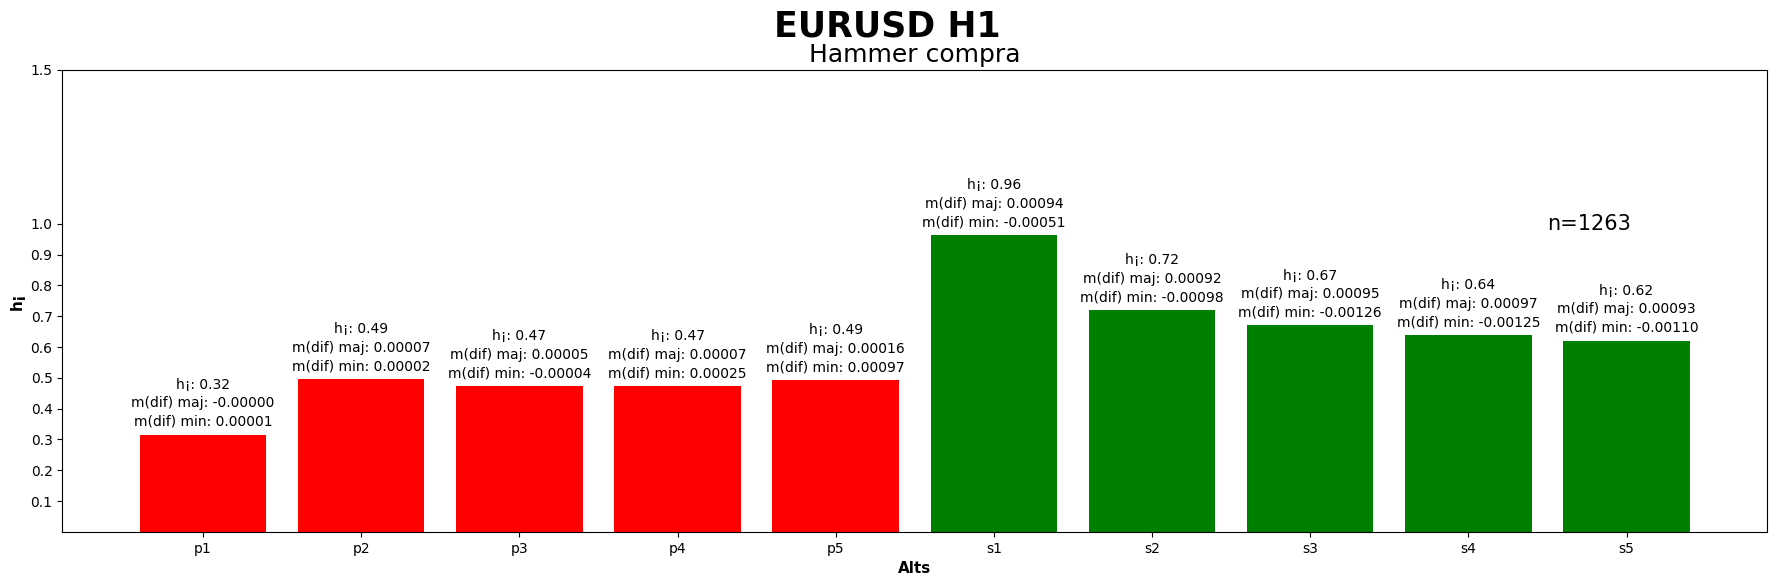

In [127]:
res = filtro['EURUSD']['compra']['Hammer'][filtro['EURUSD']['compra']['Hammer']['temporalidad'] == 'h1'.upper()]
graficar(res, titulo='EURUSD H1', subtitulo='Hammer compra')

In [16]:
res = filtro['EURUSD']['compra']['Hammer'][filtro['EURUSD']['compra']['Hammer']['temporalidad'] == 'm5'.upper()]
graficar(res, titulo='EURUSD M30', subtitulo='Hammer compra')

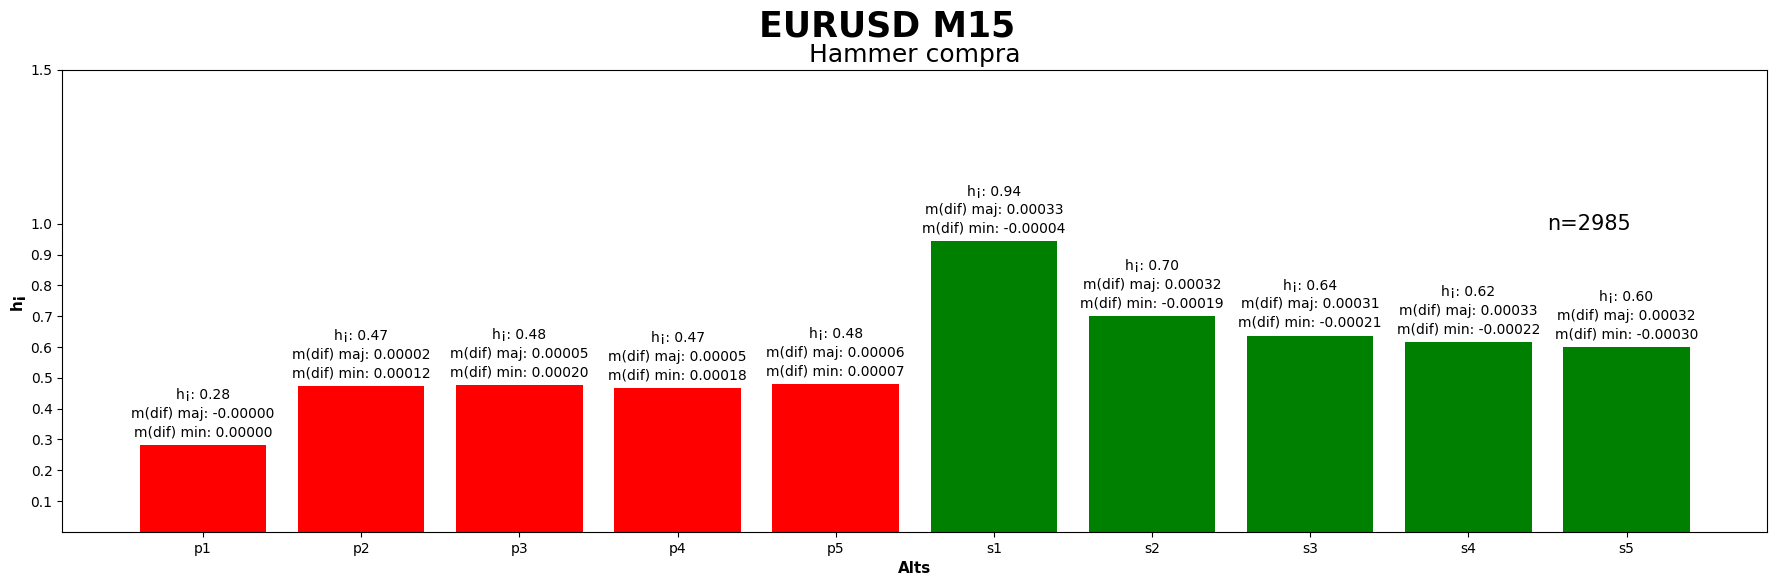

In [129]:
res = filtro['EURUSD']['compra']['Hammer'][filtro['EURUSD']['compra']['Hammer']['temporalidad'] == 'm15'.upper()]
graficar(res, titulo='EURUSD M15', subtitulo='Hammer compra')

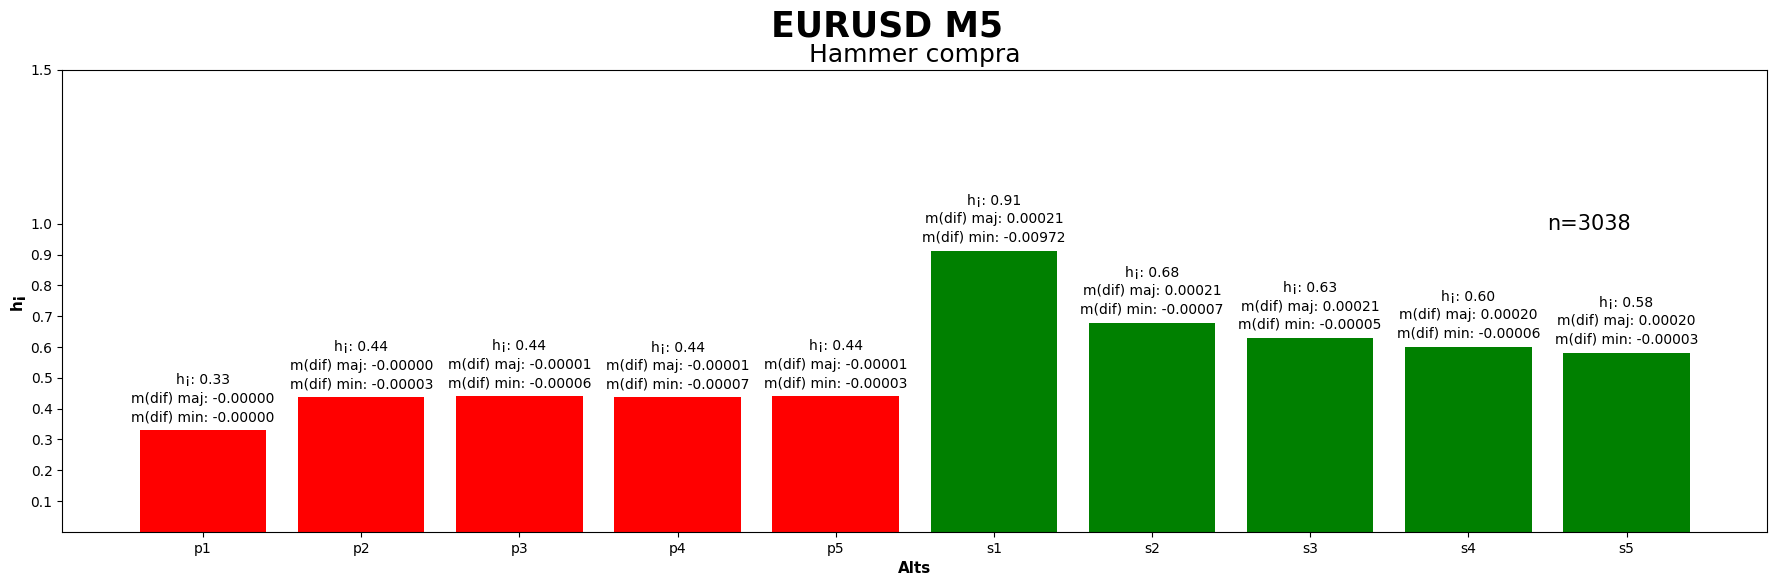

In [130]:
res = filtro['EURUSD']['compra']['Hammer'][filtro['EURUSD']['compra']['Hammer']['temporalidad'] == 'm5'.upper()]
graficar(res, titulo='EURUSD M5', subtitulo='Hammer compra')

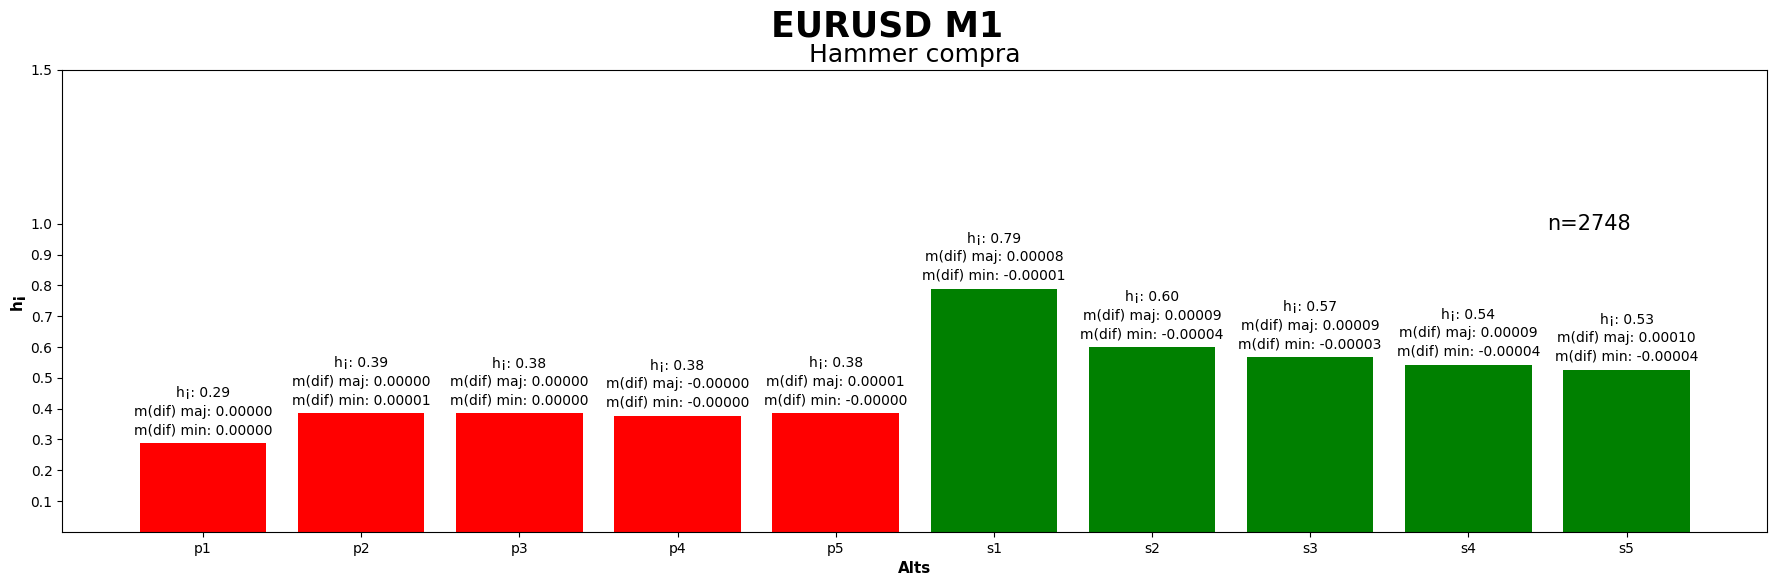

In [131]:
res = filtro['EURUSD']['compra']['Hammer'][filtro['EURUSD']['compra']['Hammer']['temporalidad'] == 'm1'.upper()]
graficar(res, titulo='EURUSD M1', subtitulo='Hammer compra')

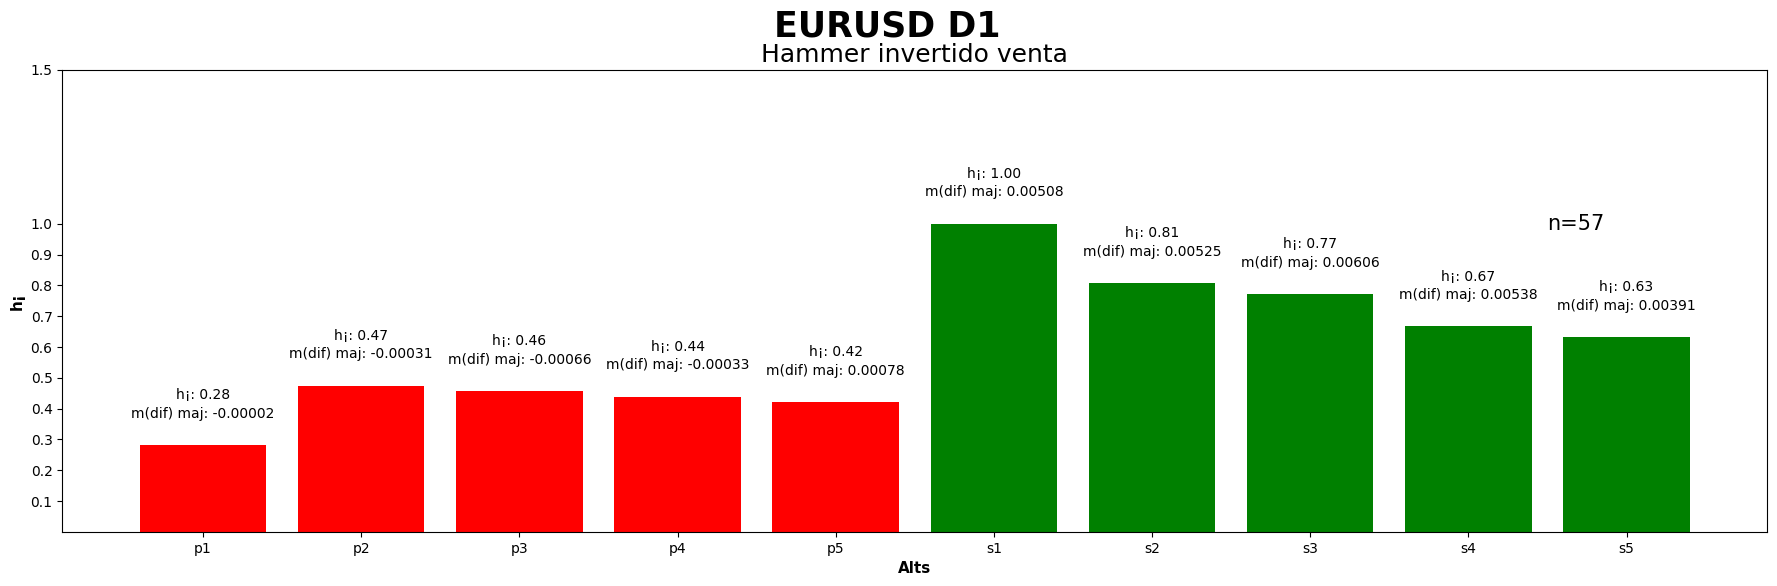

In [132]:
res = filtro['EURUSD']['venta']['Hammer invertido'][filtro['EURUSD']['venta']['Hammer invertido']['temporalidad'] == 'd1'.upper()]
graficar(res, titulo='EURUSD D1', subtitulo='Hammer invertido venta')

In [133]:
res = filtro['EURUSD']['venta']['Hammer invertido'][filtro['EURUSD']['venta']['Hammer invertido']['temporalidad'] == 'H4'.upper()]
graficar(res, titulo='EURUSD H4', subtitulo='Hammer invertido venta')

No hay datos disponibles


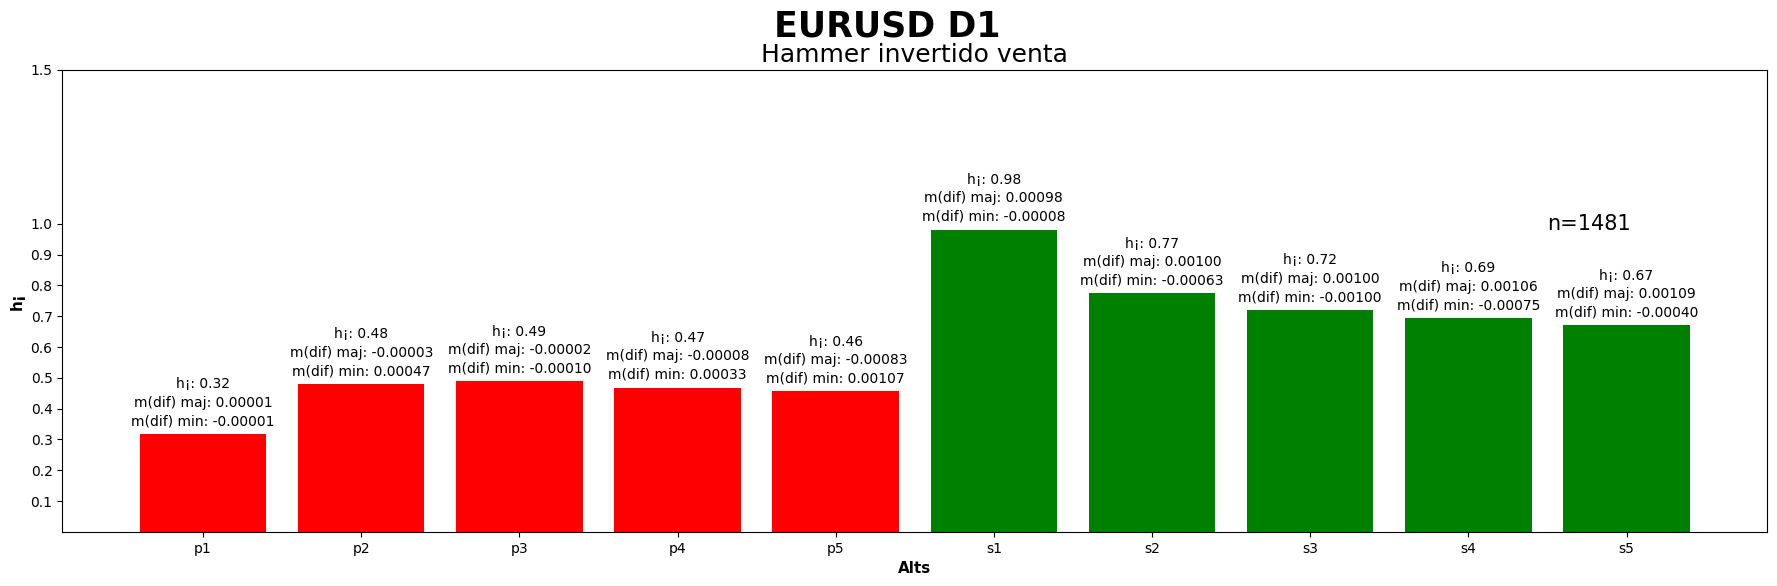

In [134]:
res = filtro['EURUSD']['venta']['Hammer invertido'][filtro['EURUSD']['venta']['Hammer invertido']['temporalidad'] == 'h1'.upper()]
graficar(res, titulo='EURUSD D1', subtitulo='Hammer invertido venta')

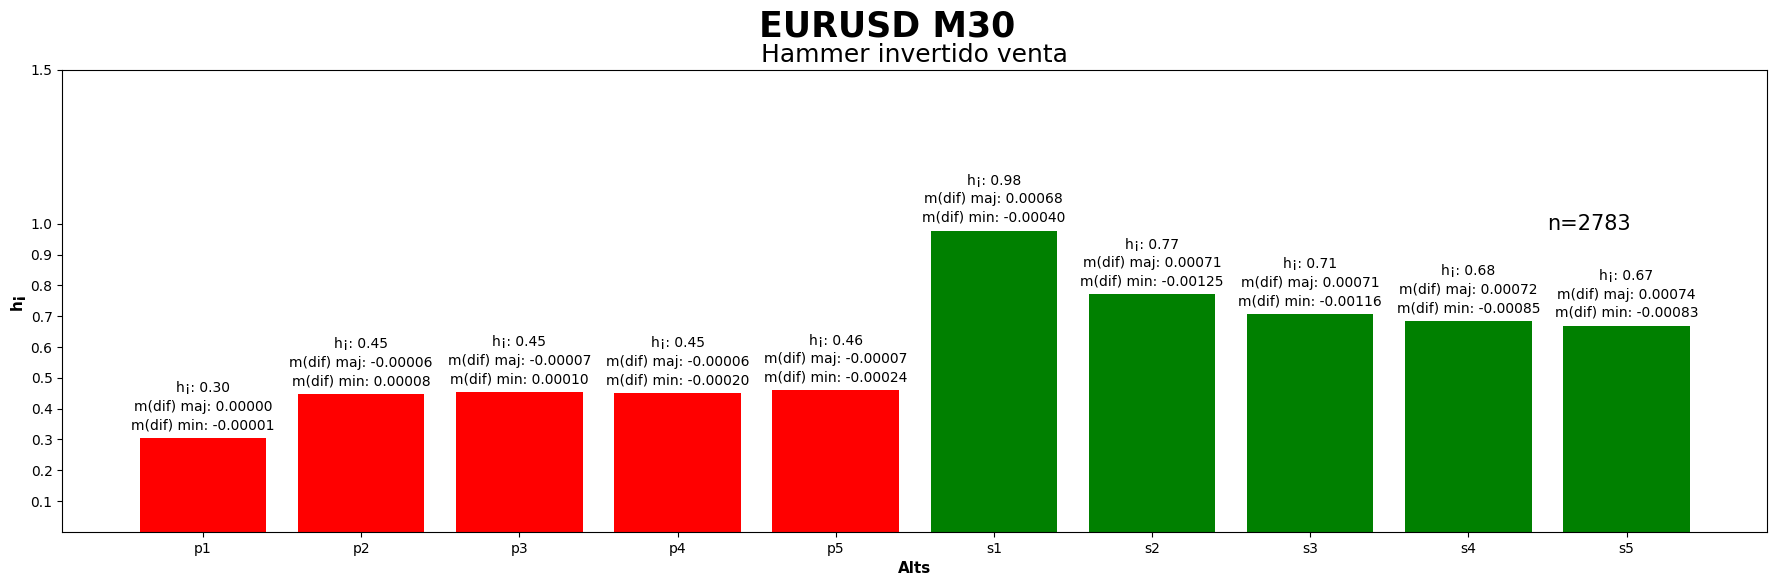

In [135]:
res = filtro['EURUSD']['venta']['Hammer invertido'][filtro['EURUSD']['venta']['Hammer invertido']['temporalidad'] == 'm30'.upper()]
graficar(res, titulo='EURUSD M30', subtitulo='Hammer invertido venta')

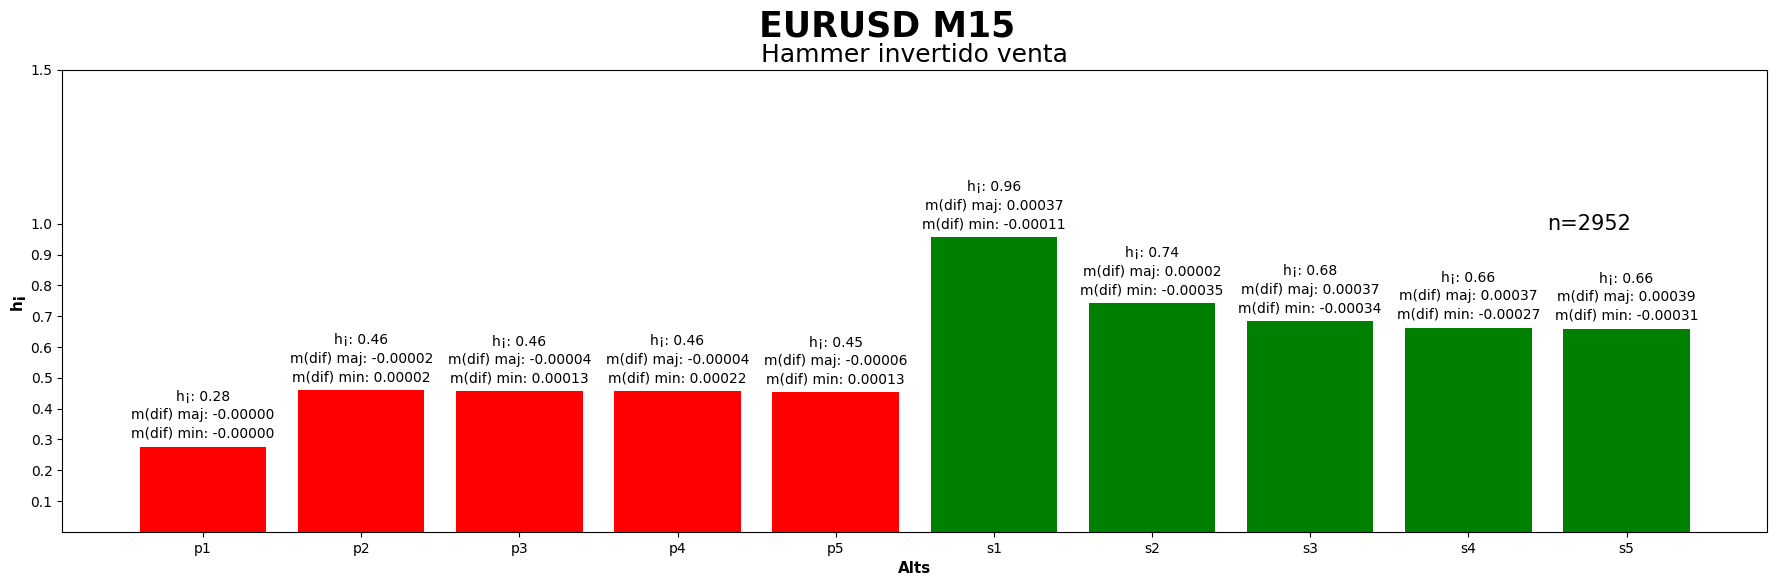

In [101]:
res = filtro['EURUSD']['venta']['Hammer invertido'][filtro['EURUSD']['venta']['Hammer invertido']['temporalidad'] == 'M15'.upper()]
graficar(res, titulo='EURUSD M15', subtitulo='Hammer invertido venta')

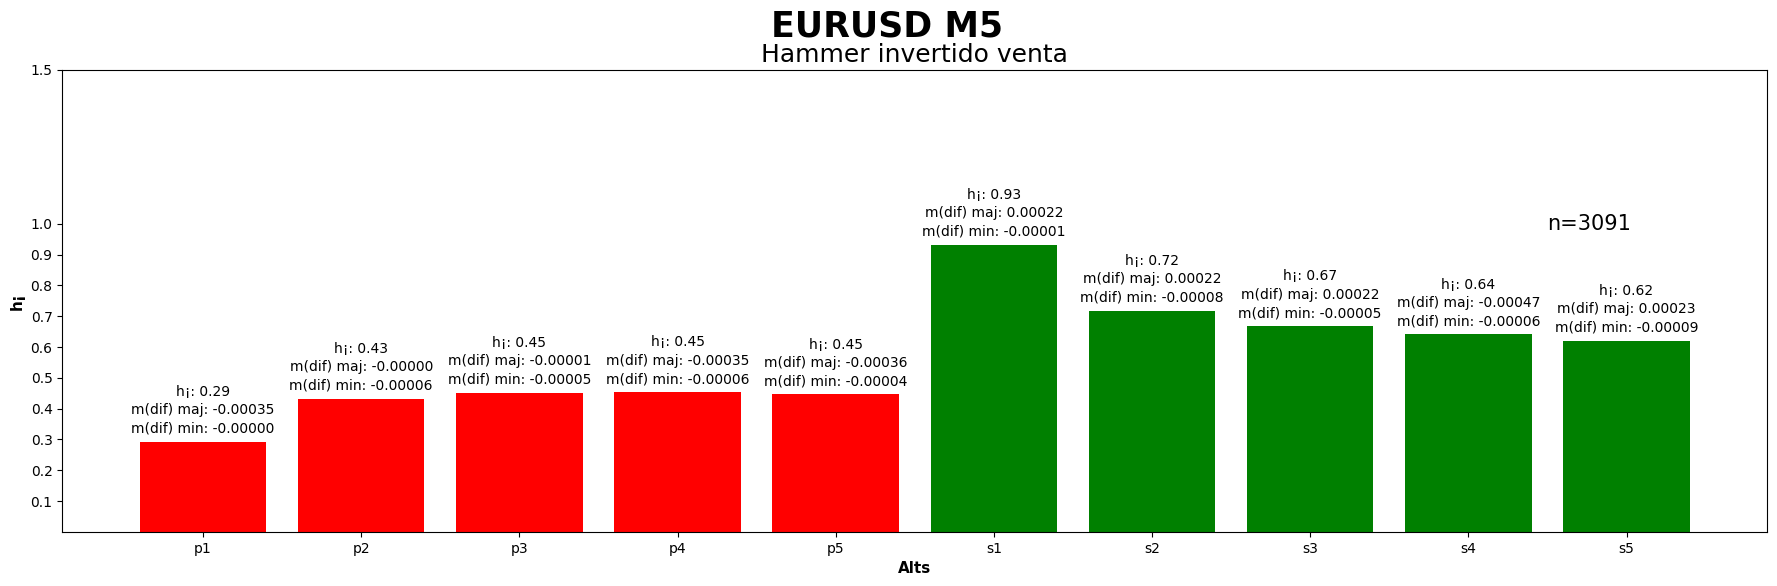

In [98]:
res = filtro['EURUSD']['venta']['Hammer invertido'][filtro['EURUSD']['venta']['Hammer invertido']['temporalidad'] == 'm5'.upper()]
graficar(res, titulo='EURUSD M5', subtitulo='Hammer invertido venta')

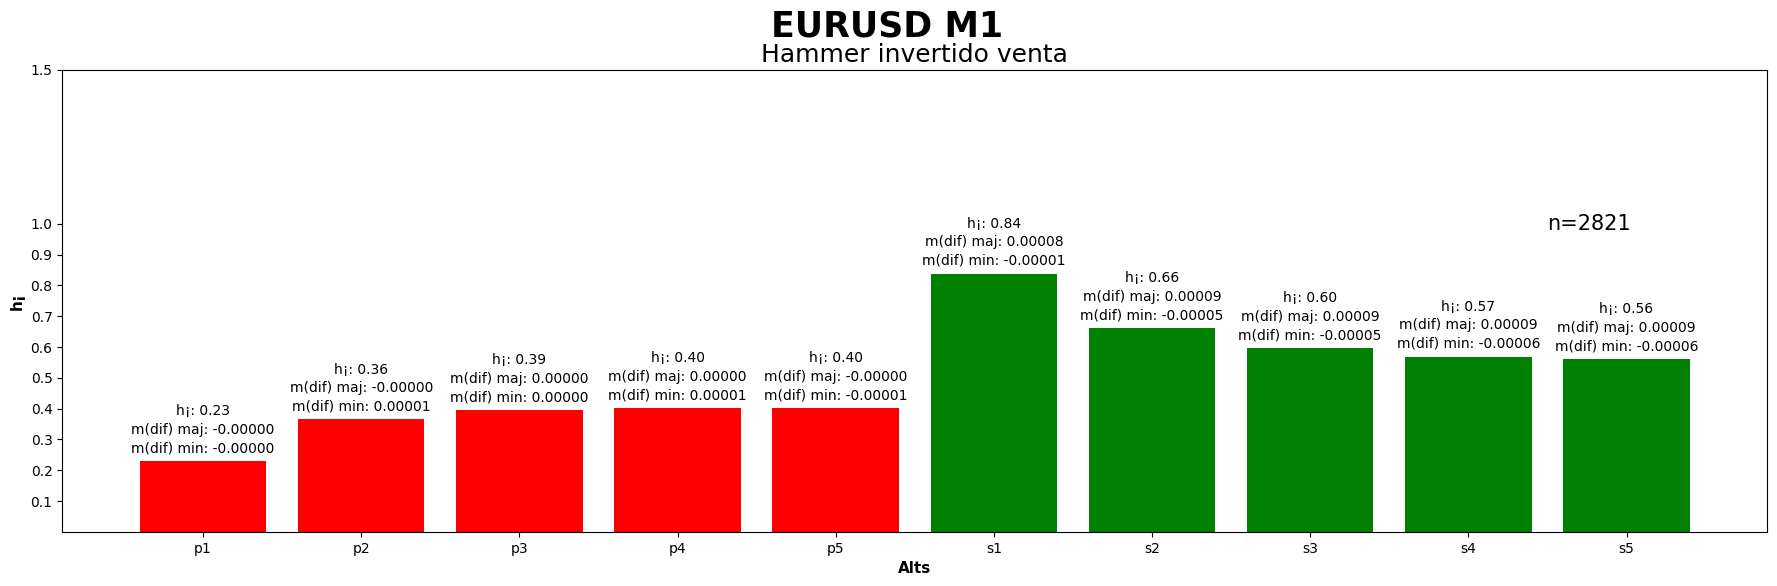

In [99]:
res = filtro['EURUSD']['venta']['Hammer invertido'][filtro['EURUSD']['venta']['Hammer invertido']['temporalidad'] == 'm1'.upper()]
graficar(res, titulo='EURUSD M1', subtitulo='Hammer invertido venta')

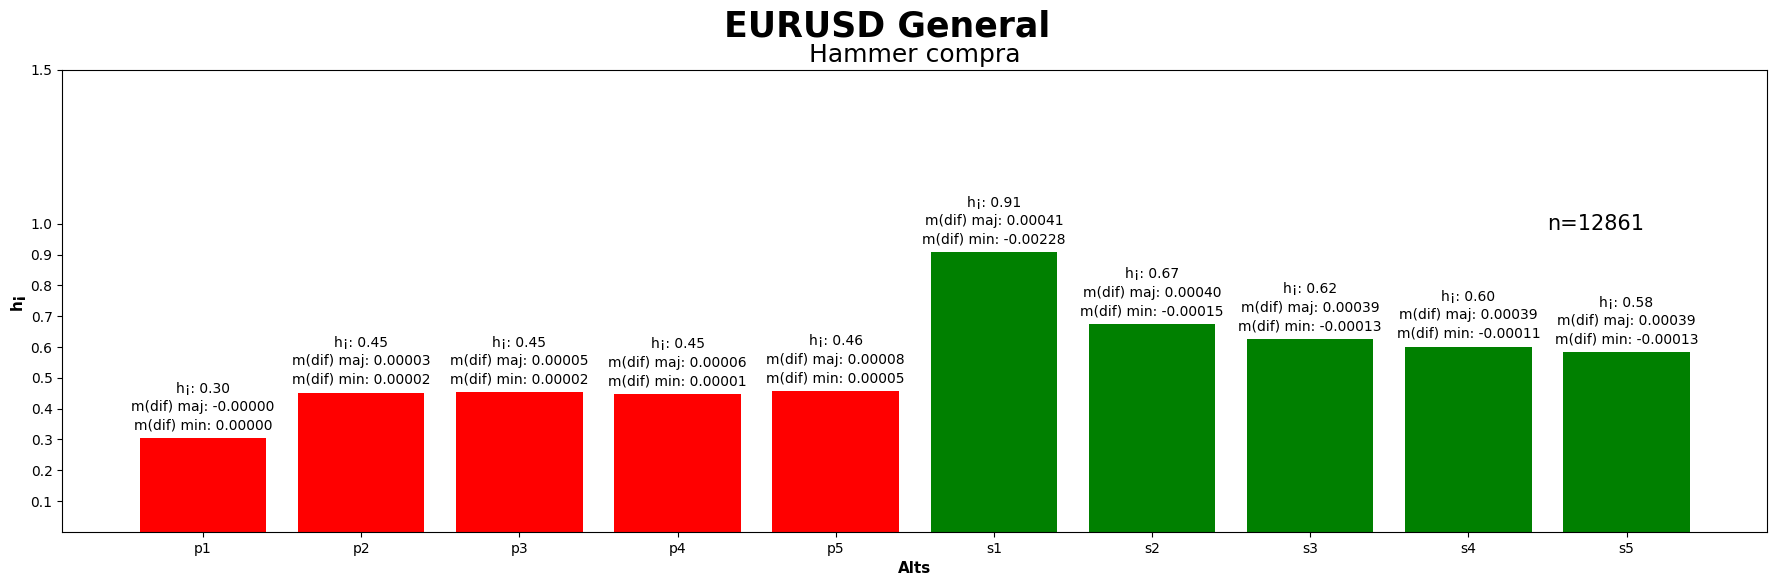

In [102]:
res = filtro['EURUSD']['compra']['Hammer']
graficar(res, titulo='EURUSD General', subtitulo='Hammer compra')

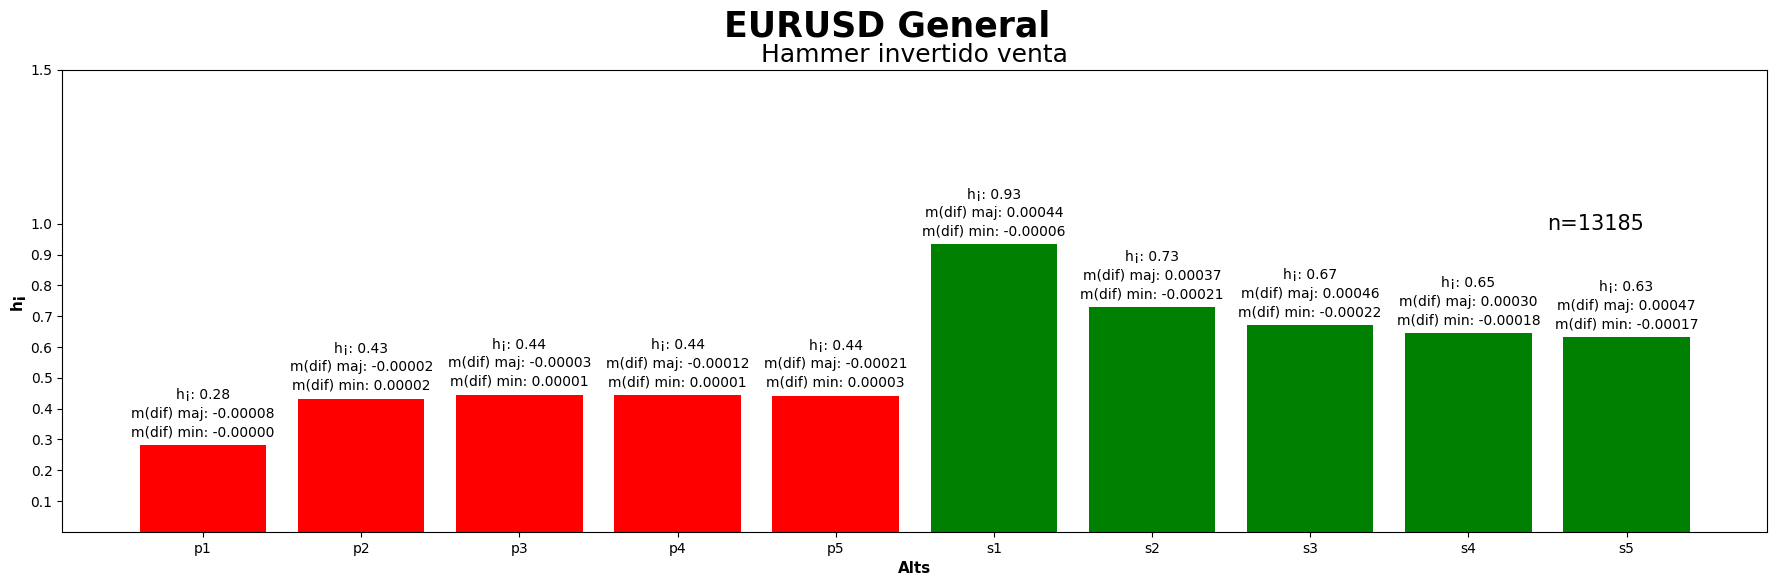

In [100]:
res = filtro['EURUSD']['venta']['Hammer invertido']
graficar(res, titulo='EURUSD General', subtitulo='Hammer invertido venta')

## Conclusiones EURUSD


## GBPUSD

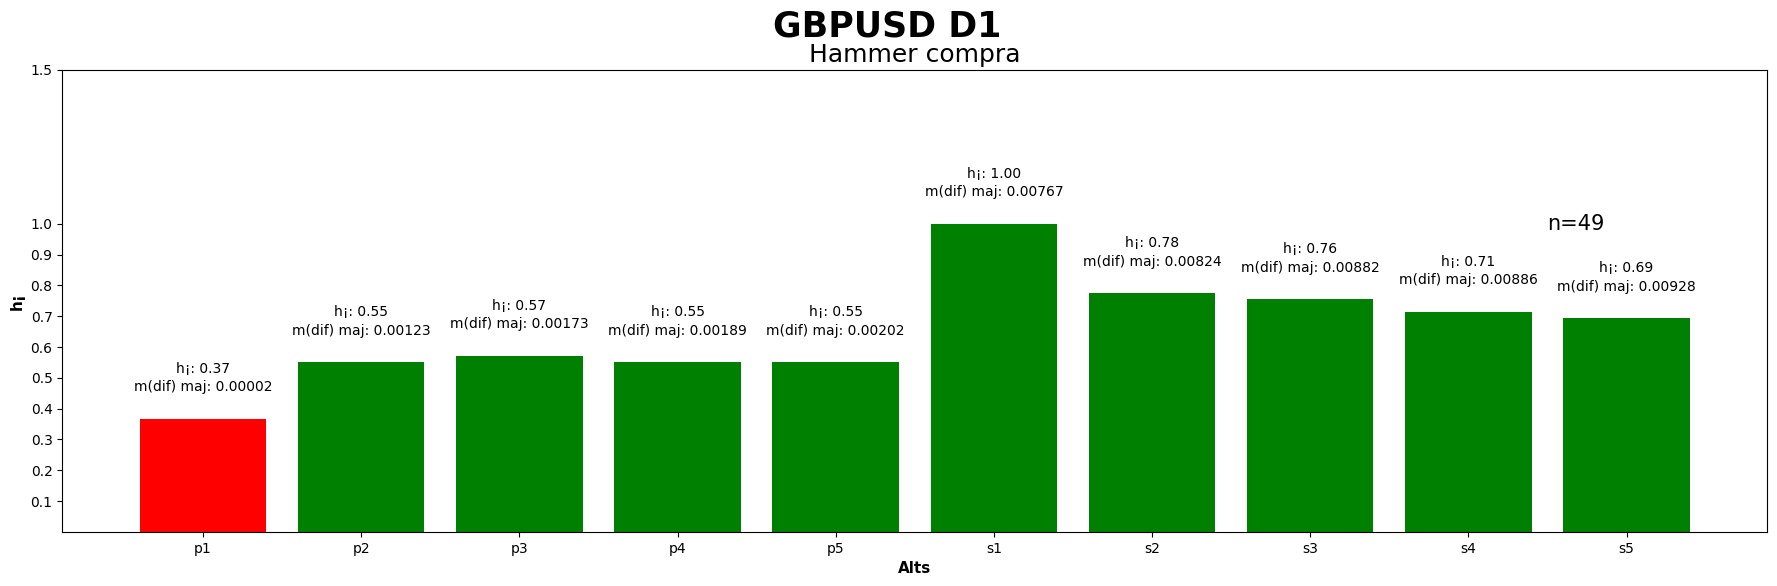

In [106]:
res = filtro['GBPUSD']['compra']['Hammer'][filtro['GBPUSD']['compra']['Hammer']['temporalidad'] == 'd1'.upper()]
graficar(res, titulo='GBPUSD D1', subtitulo='Hammer compra')

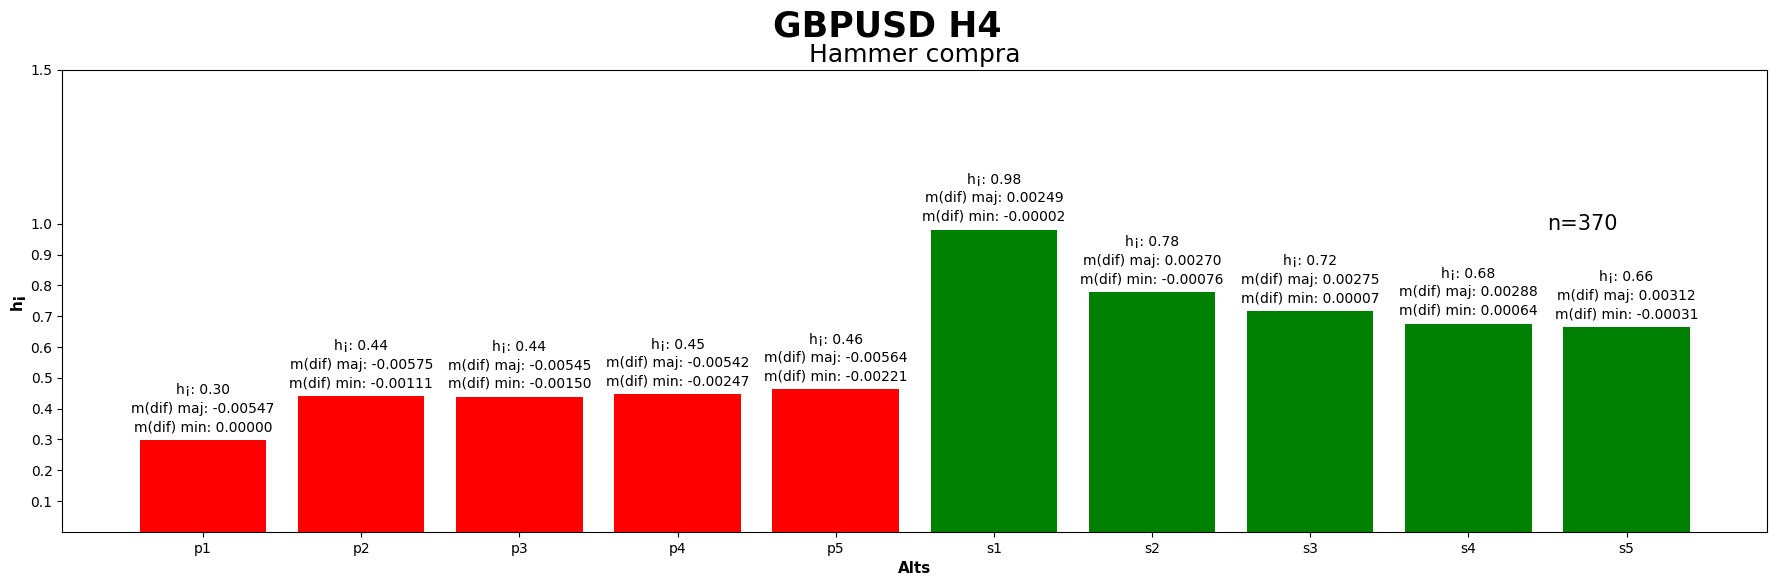

In [107]:
res = filtro['GBPUSD']['compra']['Hammer'][filtro['GBPUSD']['compra']['Hammer']['temporalidad'] == 'h4'.upper()]
graficar(res, titulo='GBPUSD H4', subtitulo='Hammer compra')

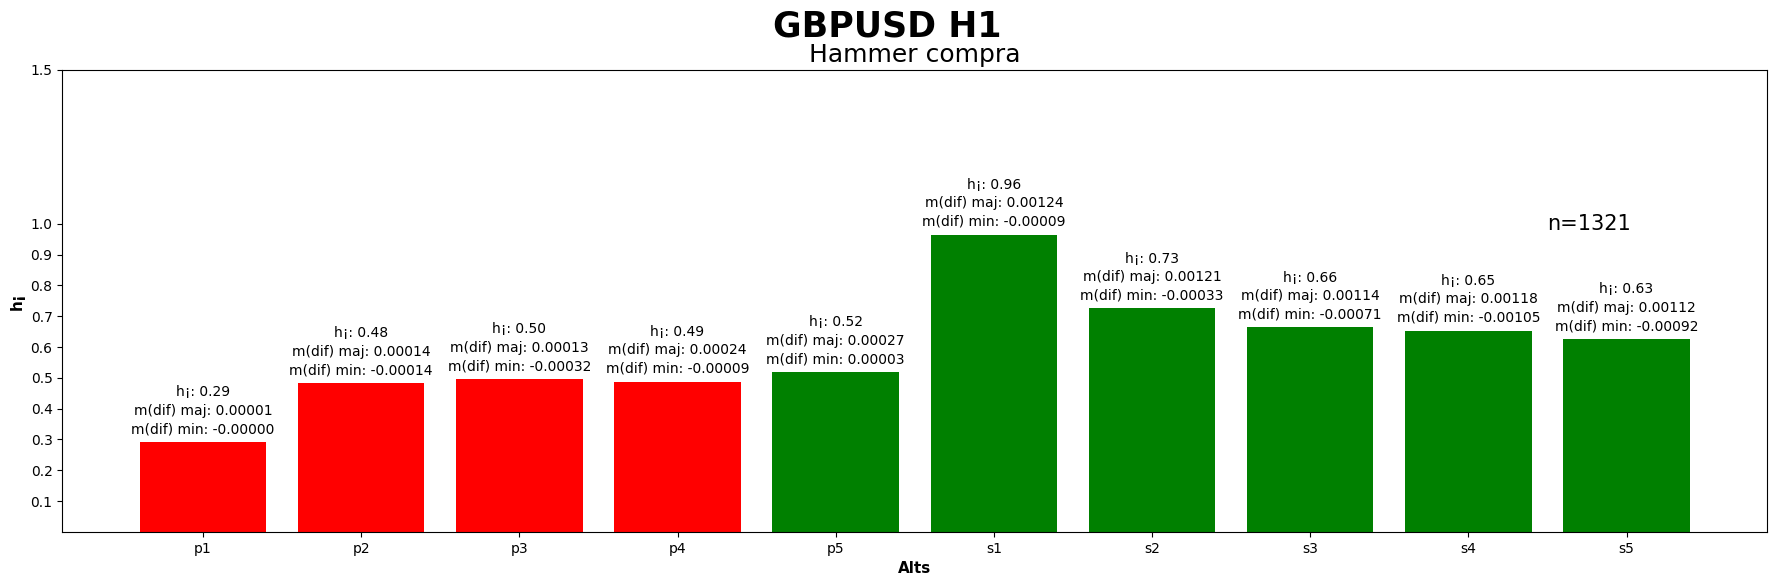

In [108]:
res = filtro['GBPUSD']['compra']['Hammer'][filtro['GBPUSD']['compra']['Hammer']['temporalidad'] == 'H1'.upper()]
graficar(res, titulo='GBPUSD H1', subtitulo='Hammer compra')

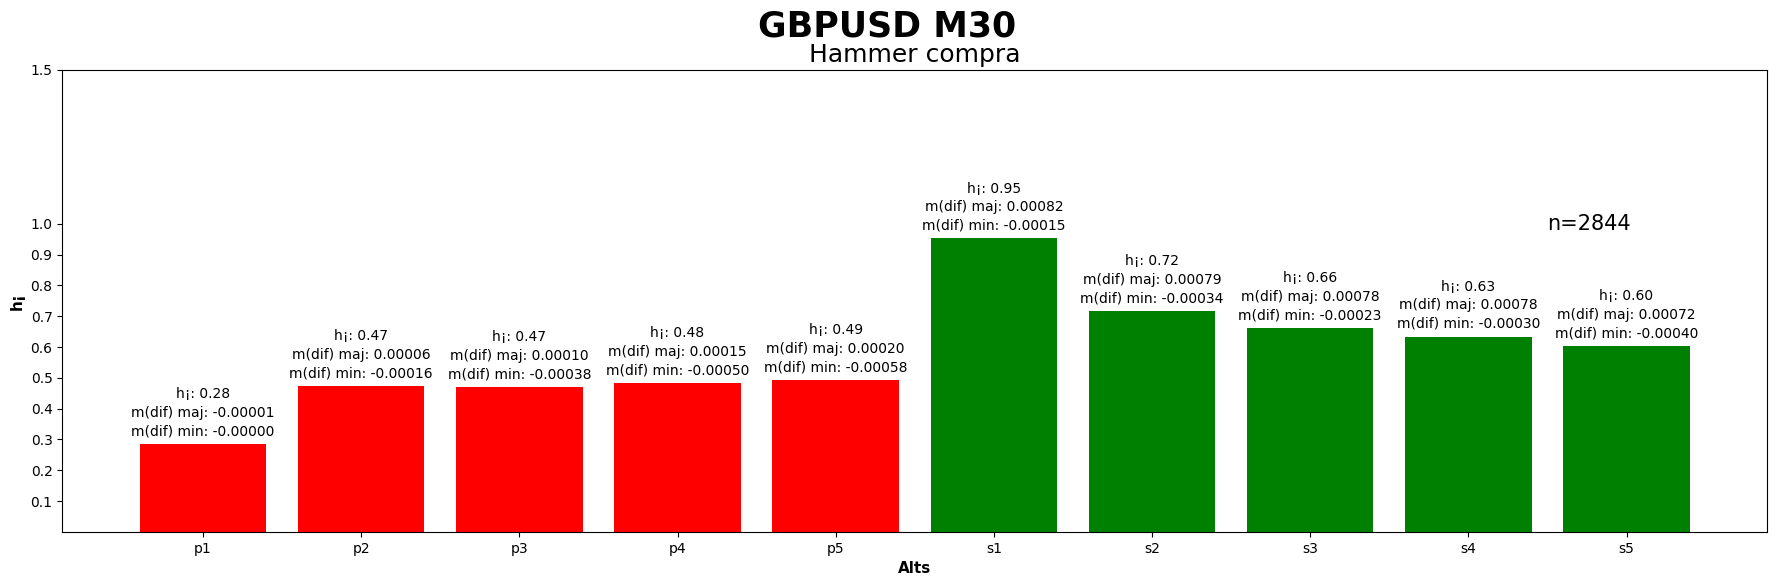

In [112]:
res = filtro['GBPUSD']['compra']['Hammer'][filtro['GBPUSD']['compra']['Hammer']['temporalidad'] == 'm30'.upper()]
graficar(res, titulo='GBPUSD M30', subtitulo='Hammer compra')

In [ ]:
res = filtro['GBPUSD']['compra']['Hammer'][filtro['GBPUSD']['compra']['Hammer']['temporalidad'] == 'm15'.upper()]
graficar(res, titulo='GBPUSD M15', subtitulo='Hammer compra')

In [ ]:
res = filtro['GBPUSD']['compra']['Hammer'][filtro['GBPUSD']['compra']['Hammer']['temporalidad'] == 'm5'.upper()]
graficar(res, titulo='GBPUSD M5', subtitulo='Hammer compra')

In [ ]:
res = filtro['GBPUSD']['compra']['Hammer'][filtro['GBPUSD']['compra']['Hammer']['temporalidad'] == 'm1'.upper()]
graficar(res, titulo='GBPUSD M30', subtitulo='Hammer compra')

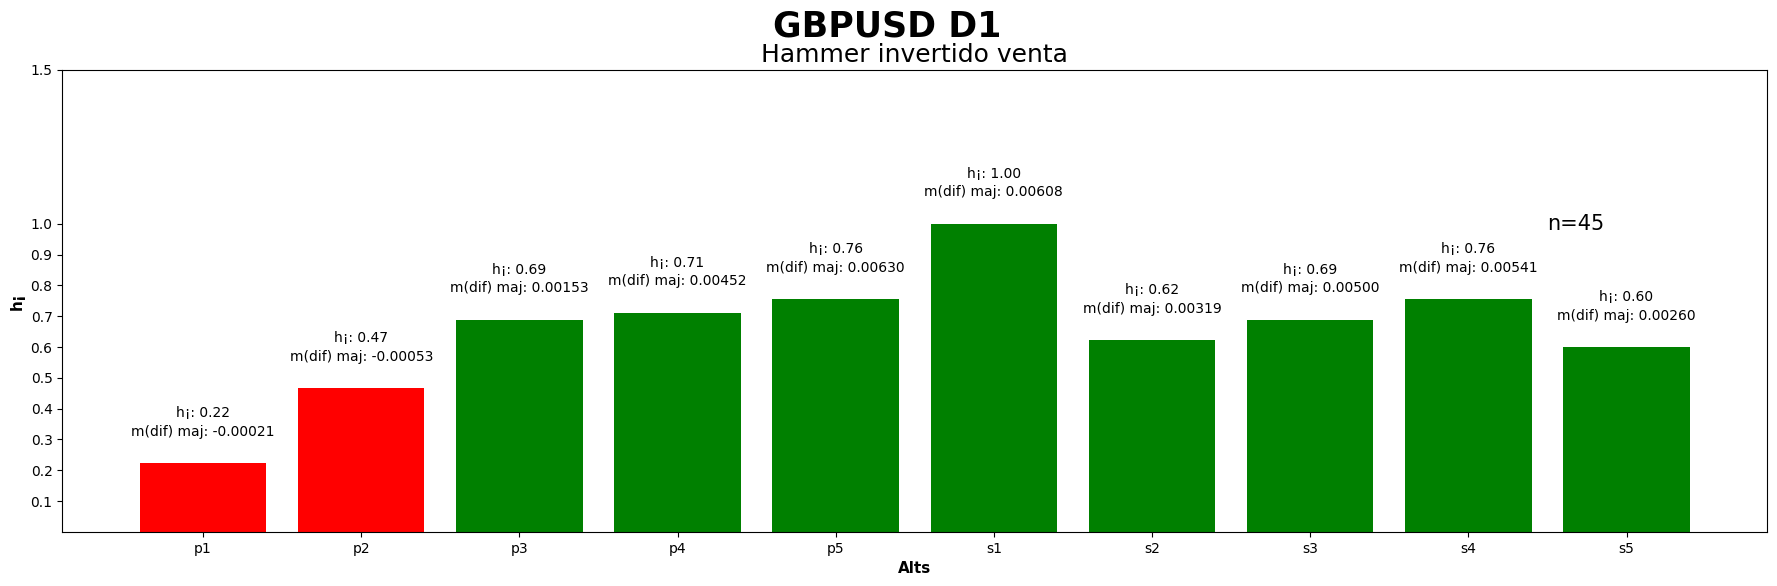

In [136]:
res = filtro['GBPUSD']['venta']['Hammer invertido'][filtro['GBPUSD']['venta']['Hammer invertido']['temporalidad'] == 'd1'.upper()]
graficar(res, titulo='GBPUSD D1', subtitulo='Hammer invertido venta')

In [ ]:
res = filtro['GBPUSD']['venta']['Hammer invertido'][filtro['GBPUSD']['venta']['Hammer invertido']['temporalidad'] == 'h4'.upper()]
graficar(res, titulo='GBPUSD D1', subtitulo='Hammer invertido venta')

In [ ]:
res = filtro['GBPUSD']['venta']['Hammer invertido'][filtro['GBPUSD']['venta']['Hammer invertido']['temporalidad'] == 'h1'.upper()]
graficar(res, titulo='GBPUSD D1', subtitulo='Hammer invertido venta')

In [ ]:
res = filtro['GBPUSD']['venta']['Hammer invertido'][filtro['GBPUSD']['venta']['Hammer invertido']['temporalidad'] == 'm30'.upper()]
graficar(res, titulo='GBPUSD M30', subtitulo='Hammer invertido venta')

In [ ]:
res = filtro['GBPUSD']['venta']['Hammer invertido'][filtro['GBPUSD']['venta']['Hammer invertido']['temporalidad'] == 'm15'.upper()]
graficar(res, titulo='GBPUSD M15', subtitulo='Hammer invertido venta')

In [ ]:
res = filtro['GBPUSD']['venta']['Hammer invertido'][filtro['GBPUSD']['venta']['Hammer invertido']['temporalidad'] == 'm5'.upper()]
graficar(res, titulo='GBPUSD m5', subtitulo='Hammer invertido venta')

In [ ]:
res = filtro['GBPUSD']['venta']['Hammer invertido'][filtro['GBPUSD']['venta']['Hammer invertido']['temporalidad'] == 'm1'.upper()]
graficar(res, titulo='GBPUSD M1', subtitulo='Hammer invertido venta')

In [ ]:
res = filtro['GBPUSD']['compra']['Hammer']
graficar(res, titulo='GBPUSD General', subtitulo='Hammer compra')

In [ ]:
res = filtro['GBPUSD']['venta']['Hammer invertido']
graficar(res, titulo='GBPUSD General', subtitulo='Hammer invertido venta')

## USDCAT

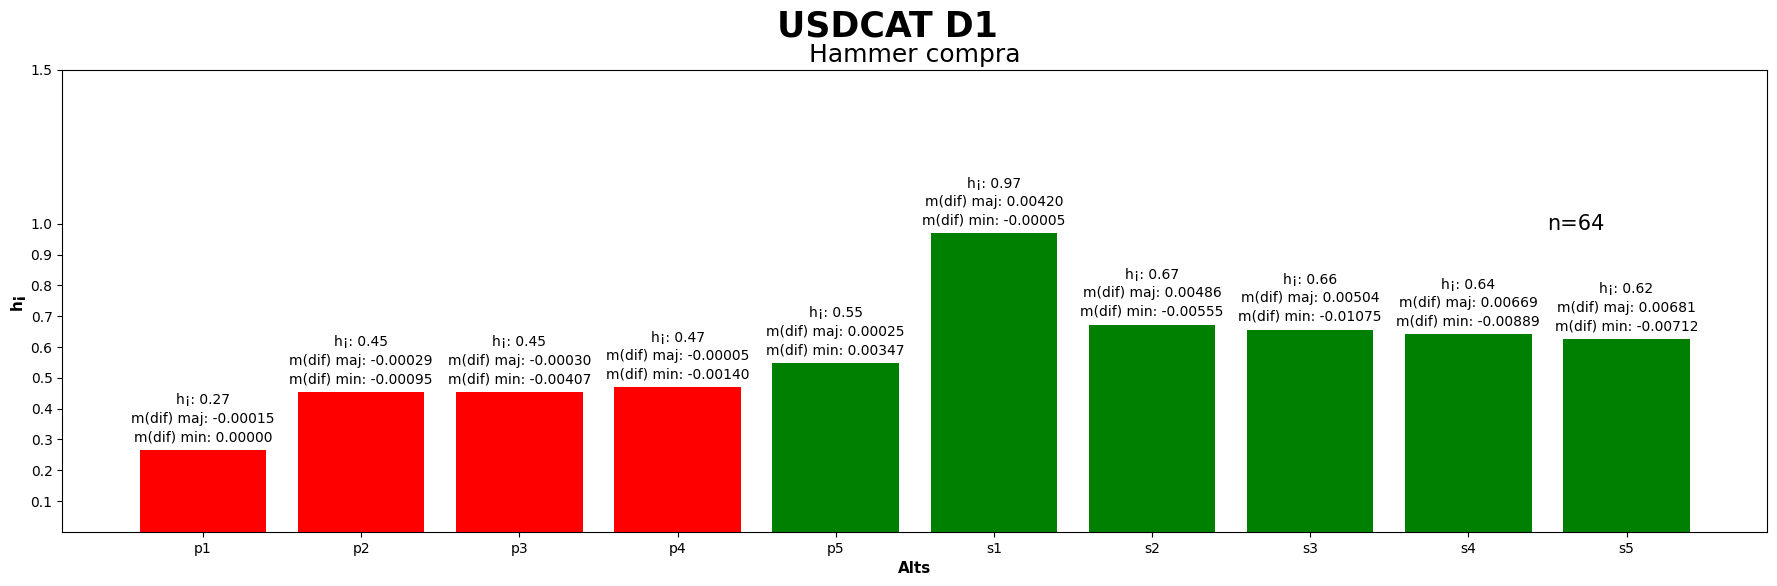

In [115]:
res = filtro['USDCAD']['compra']['Hammer'][filtro['USDCAD']['compra']['Hammer']['temporalidad'] == 'd1'.upper()]
graficar(res, titulo='USDCAT D1', subtitulo='Hammer compra')

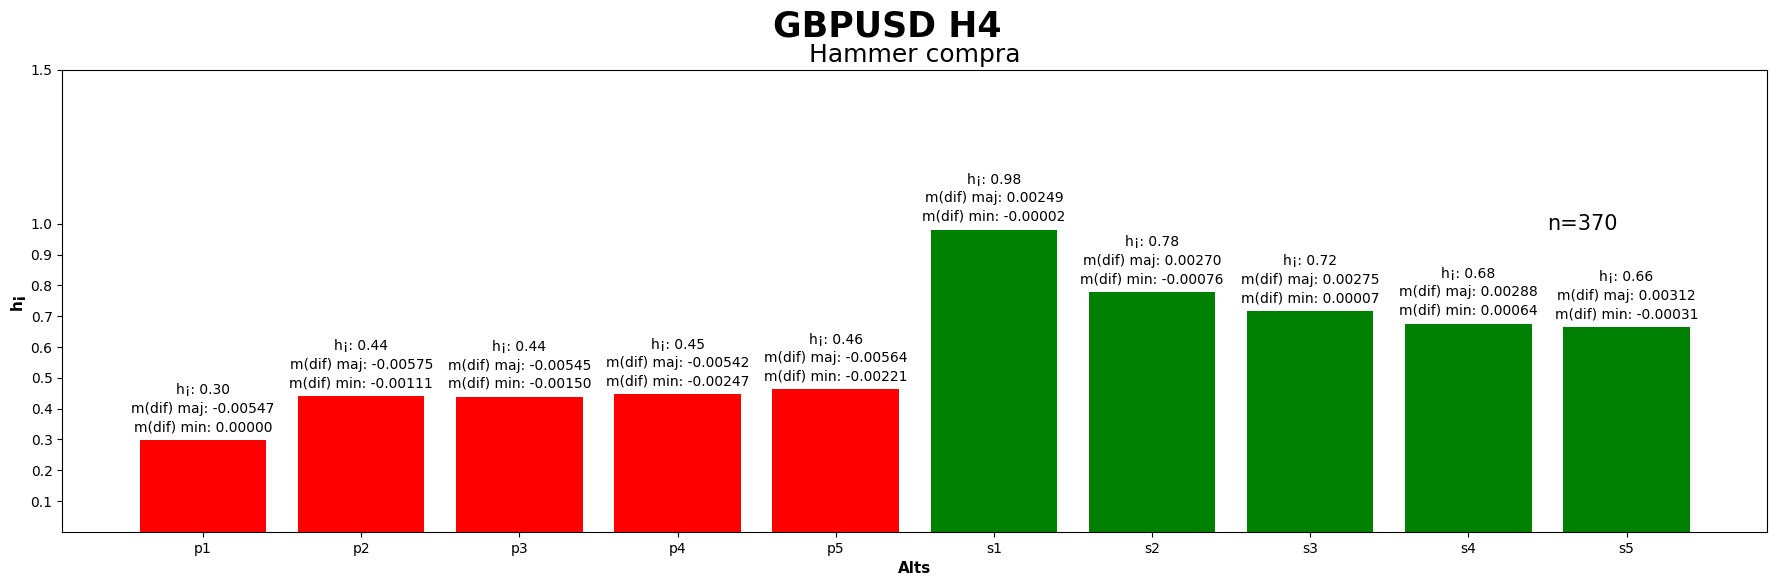

In [116]:
res = filtro['USDCAD']['compra']['Hammer'][filtro['USDCAD']['compra']['Hammer']['temporalidad'] == 'h4'.upper()]
graficar(res, titulo='USDCAD H4', subtitulo='Hammer compra')

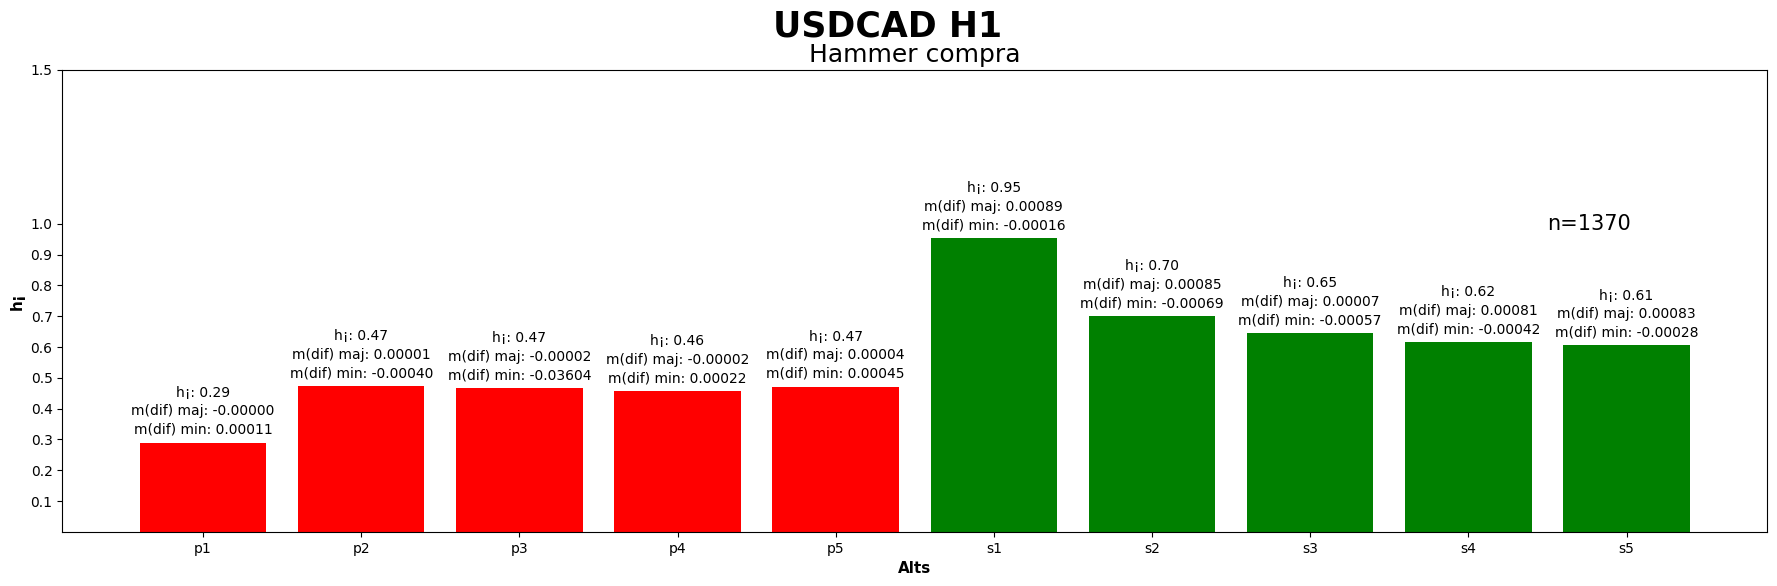

In [138]:
res = filtro['USDCAD']['compra']['Hammer'][filtro['USDCAD']['compra']['Hammer']['temporalidad'] == 'h1'.upper()]
graficar(res, titulo='USDCAD H1', subtitulo='Hammer compra')

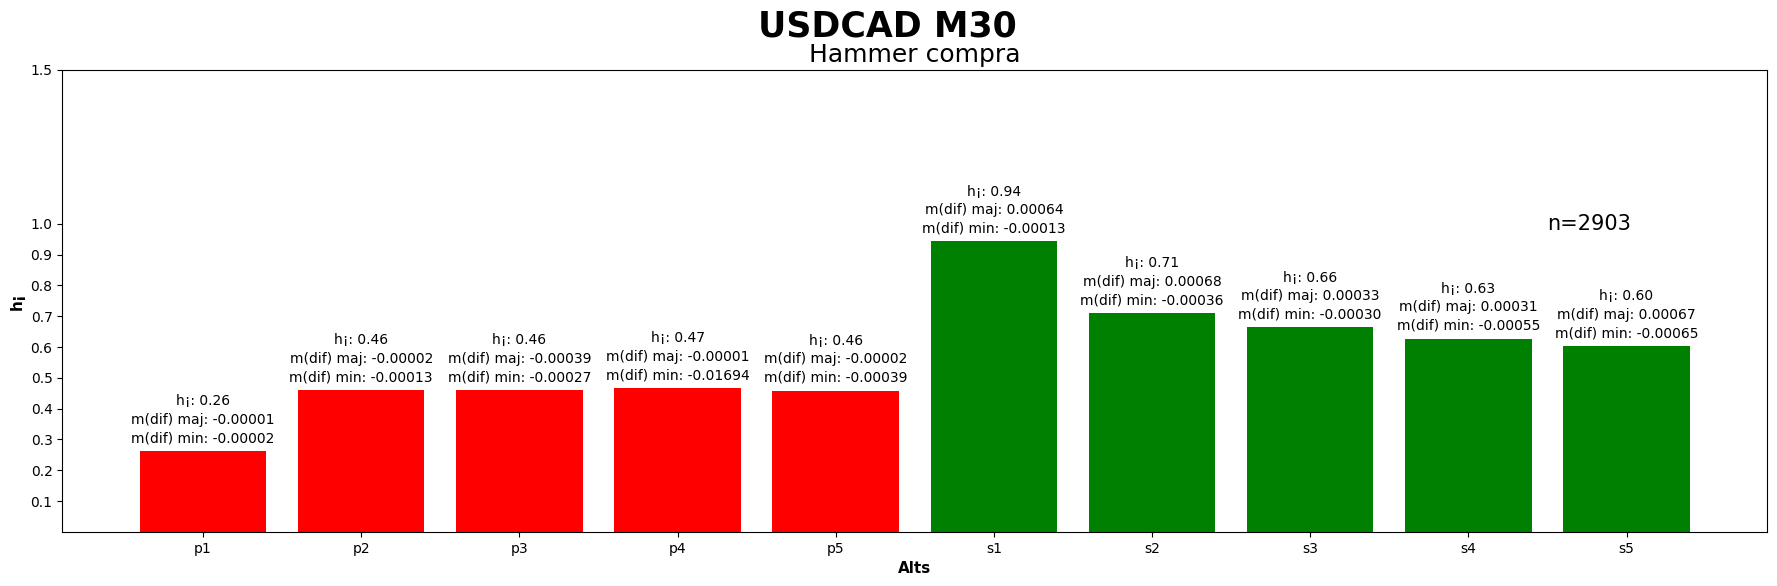

In [139]:
res = filtro['USDCAD']['compra']['Hammer'][filtro['USDCAD']['compra']['Hammer']['temporalidad'] == 'm30'.upper()]
graficar(res, titulo='USDCAD M30', subtitulo='Hammer compra')

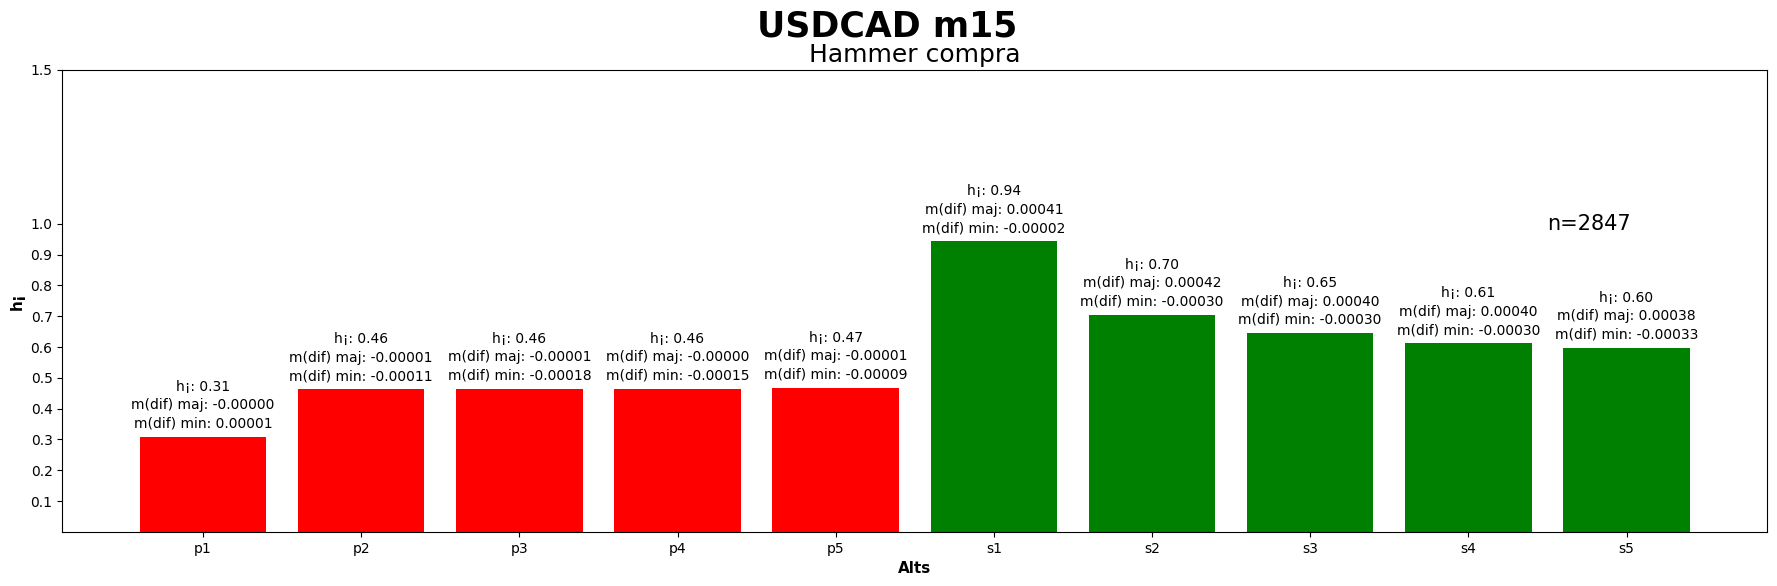

In [140]:
res = filtro['USDCAD']['compra']['Hammer'][filtro['USDCAD']['compra']['Hammer']['temporalidad'] == 'm15'.upper()]
graficar(res, titulo='USDCAD m15', subtitulo='Hammer compra')

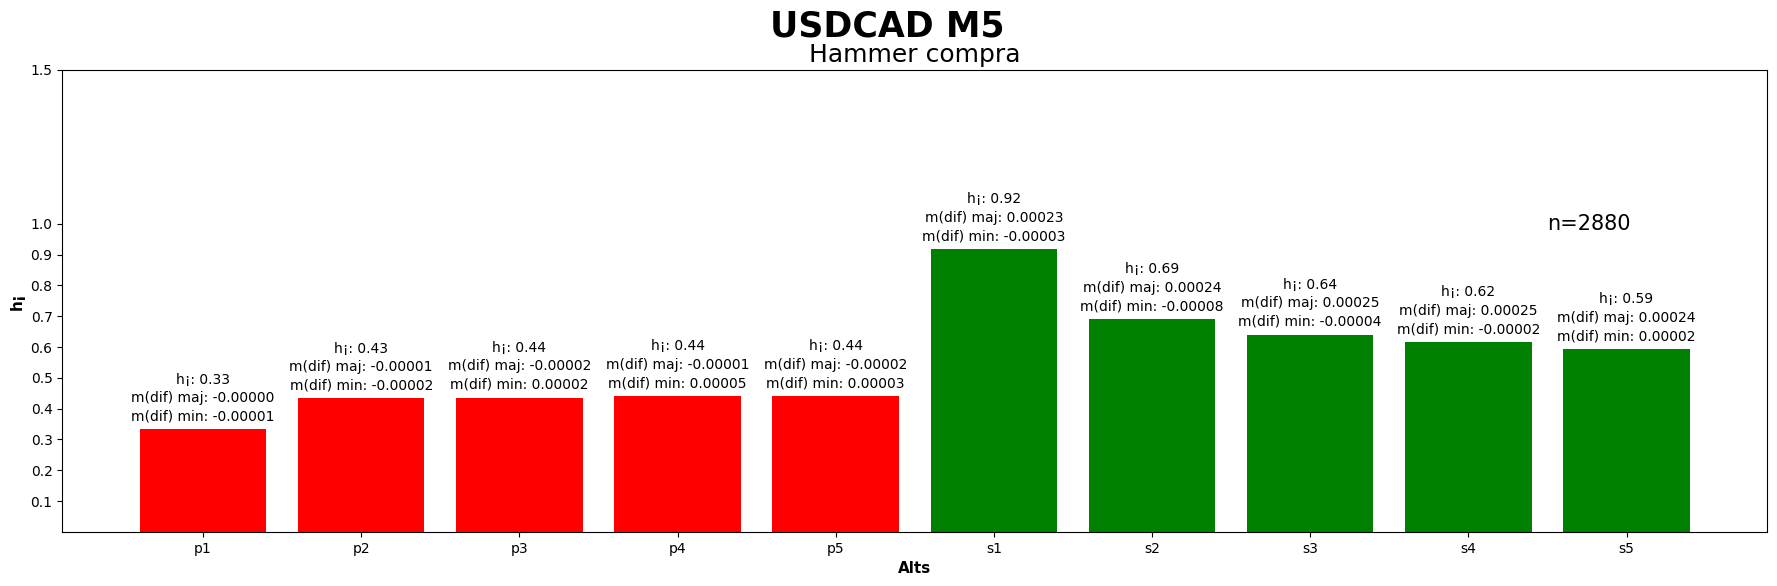

In [141]:
res = filtro['USDCAD']['compra']['Hammer'][filtro['USDCAD']['compra']['Hammer']['temporalidad'] == 'm5'.upper()]
graficar(res, titulo='USDCAD M5', subtitulo='Hammer compra')

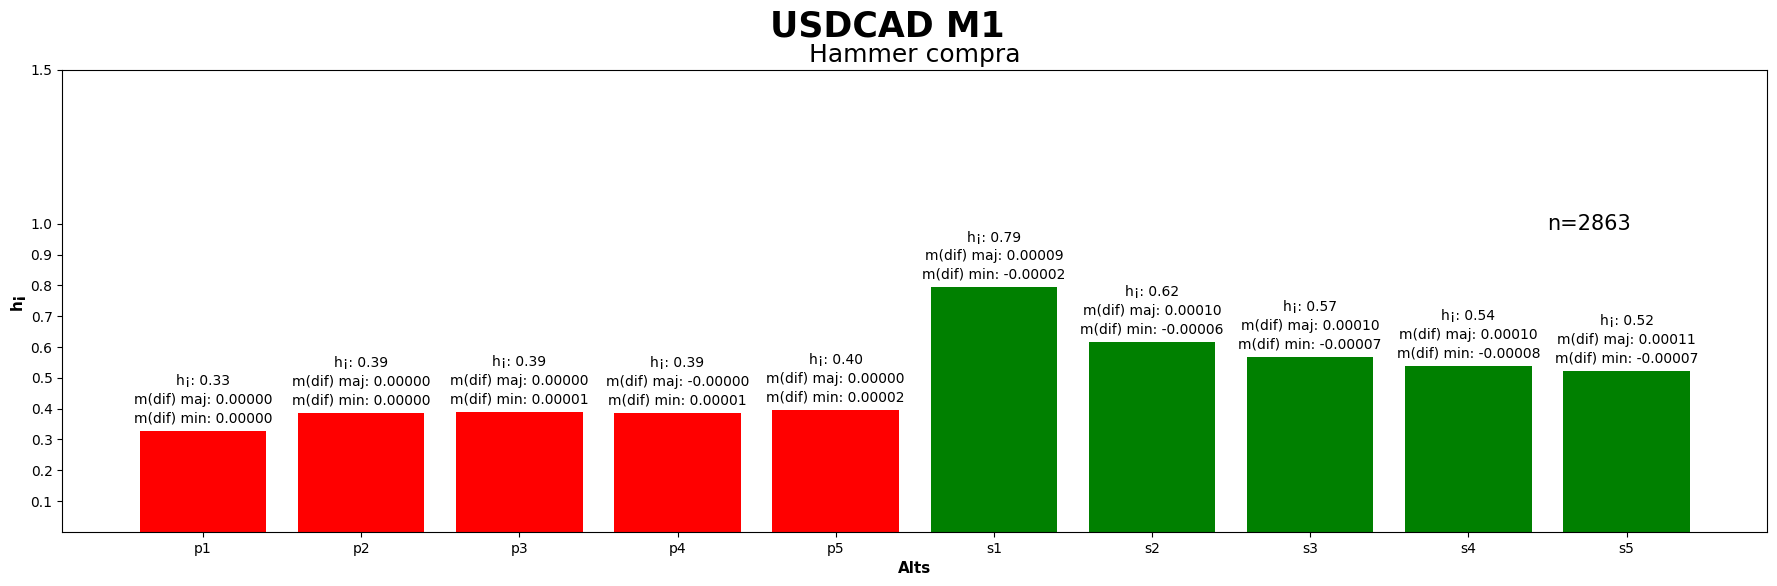

In [142]:
res = filtro['USDCAD']['compra']['Hammer'][filtro['USDCAD']['compra']['Hammer']['temporalidad'] == 'm1'.upper()]
graficar(res, titulo='USDCAD M1', subtitulo='Hammer compra')

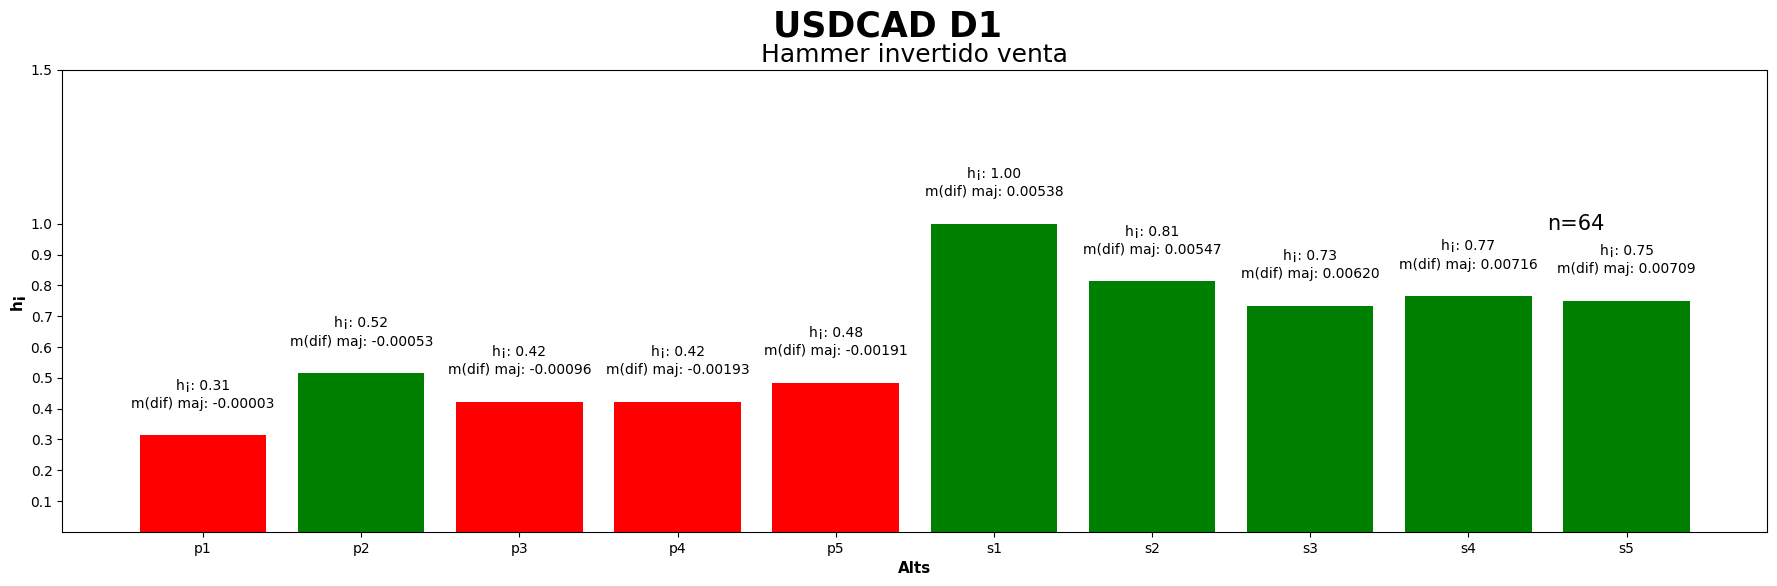

In [143]:
res = filtro['USDCAD']['venta']['Hammer invertido'][filtro['USDCAD']['venta']['Hammer invertido']['temporalidad'] == 'd1'.upper()]
graficar(res, titulo='USDCAD D1', subtitulo='Hammer invertido venta')

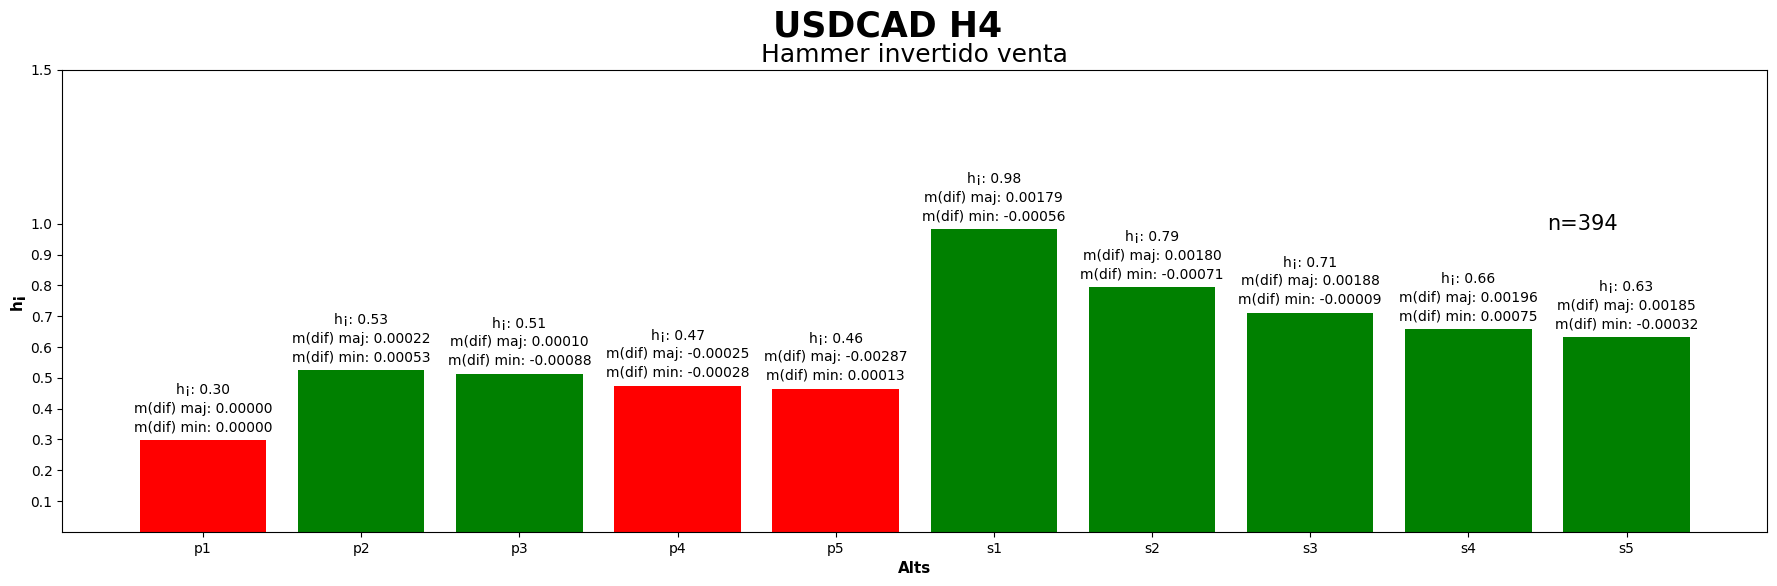

In [144]:
res = filtro['USDCAD']['venta']['Hammer invertido'][filtro['USDCAD']['venta']['Hammer invertido']['temporalidad'] == 'h4'.upper()]
graficar(res, titulo='USDCAD H4', subtitulo='Hammer invertido venta')

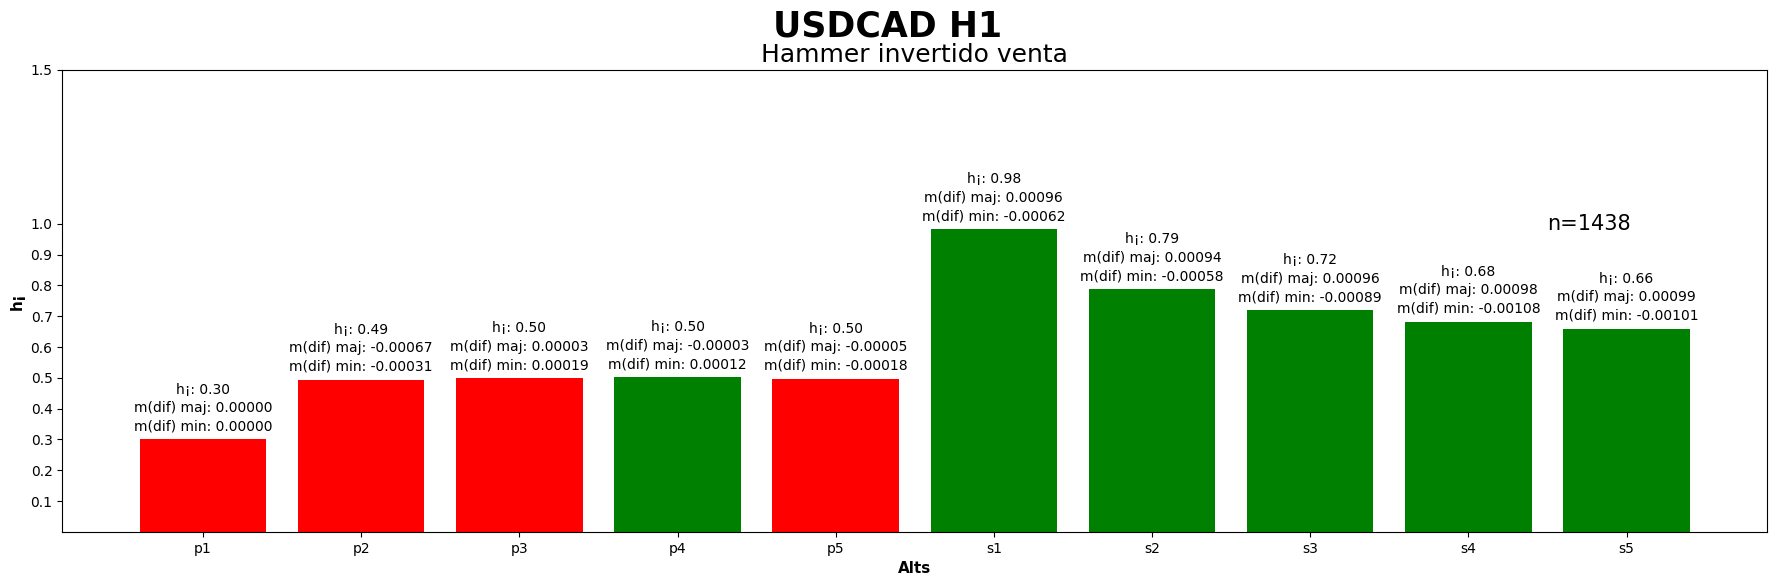

In [145]:
res = filtro['USDCAD']['venta']['Hammer invertido'][filtro['USDCAD']['venta']['Hammer invertido']['temporalidad'] == 'h1'.upper()]
graficar(res, titulo='USDCAD H1', subtitulo='Hammer invertido venta')

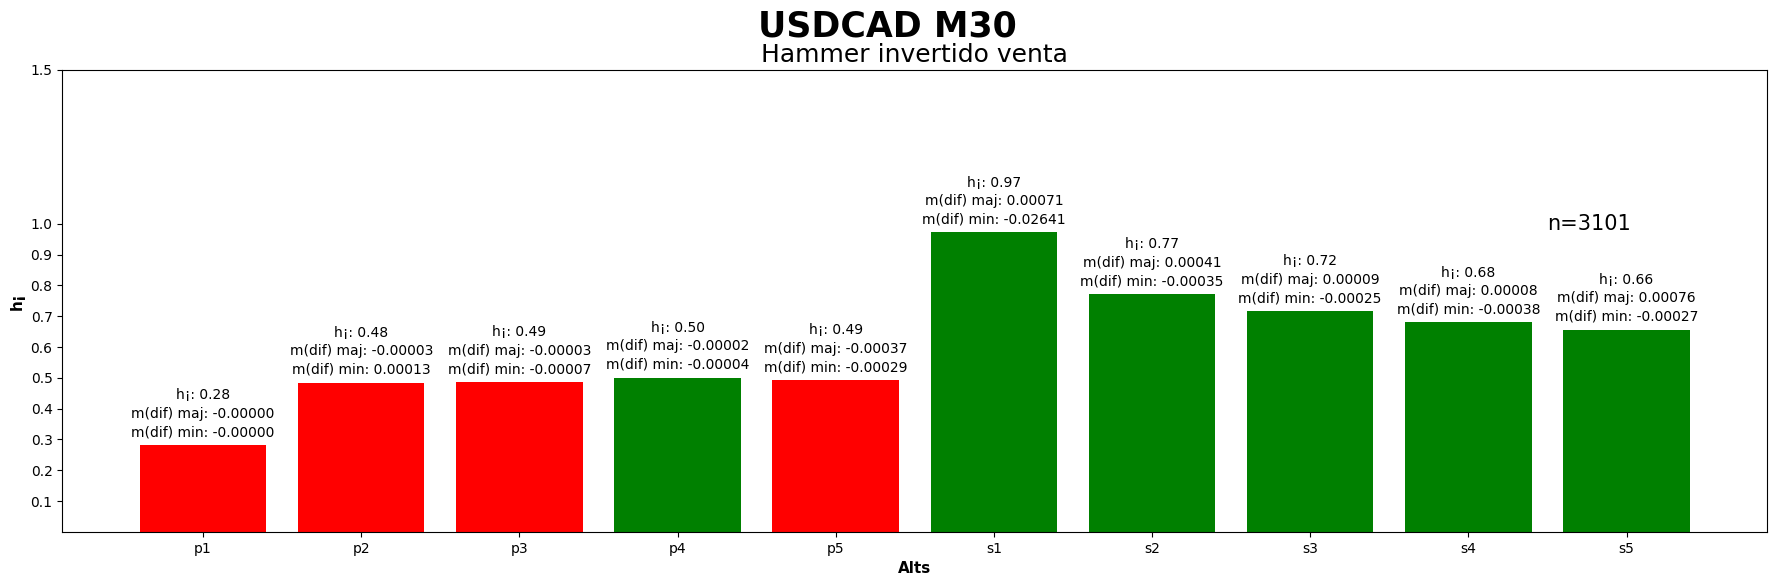

In [146]:
res = filtro['USDCAD']['venta']['Hammer invertido'][filtro['USDCAD']['venta']['Hammer invertido']['temporalidad'] == 'm30'.upper()]
graficar(res, titulo='USDCAD M30', subtitulo='Hammer invertido venta')

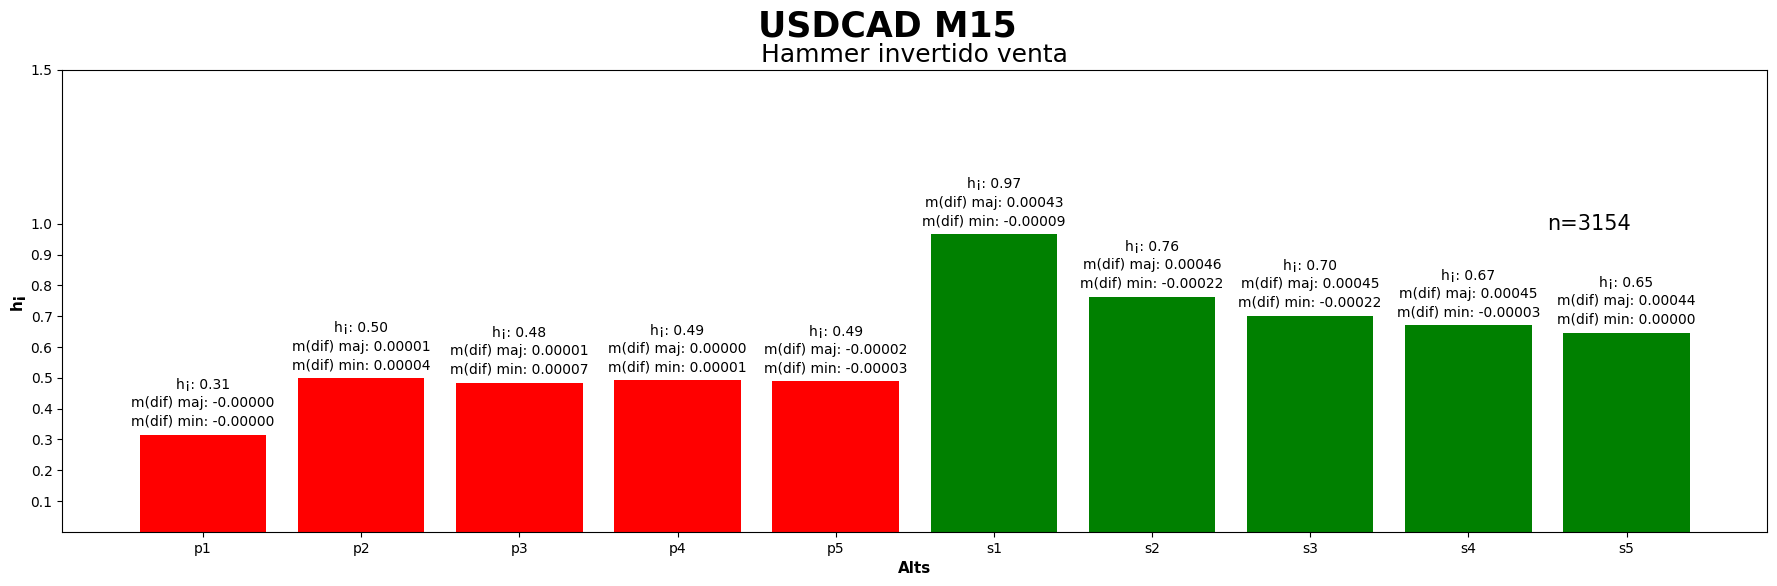

In [147]:
res = filtro['USDCAD']['venta']['Hammer invertido'][filtro['USDCAD']['venta']['Hammer invertido']['temporalidad'] == 'm15'.upper()]
graficar(res, titulo='USDCAD M15', subtitulo='Hammer invertido venta')

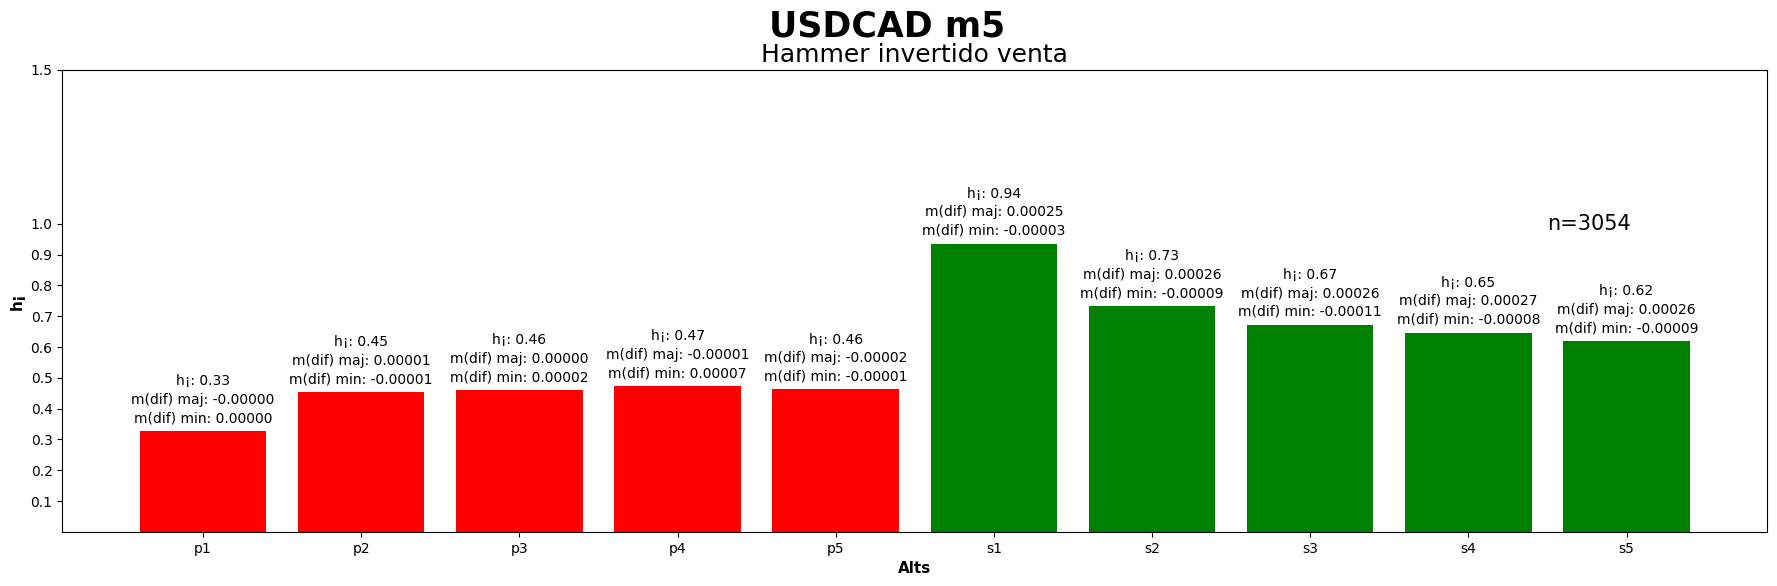

In [148]:
res = filtro['USDCAD']['venta']['Hammer invertido'][filtro['USDCAD']['venta']['Hammer invertido']['temporalidad'] == 'm5'.upper()]
graficar(res, titulo='USDCAD m5', subtitulo='Hammer invertido venta')

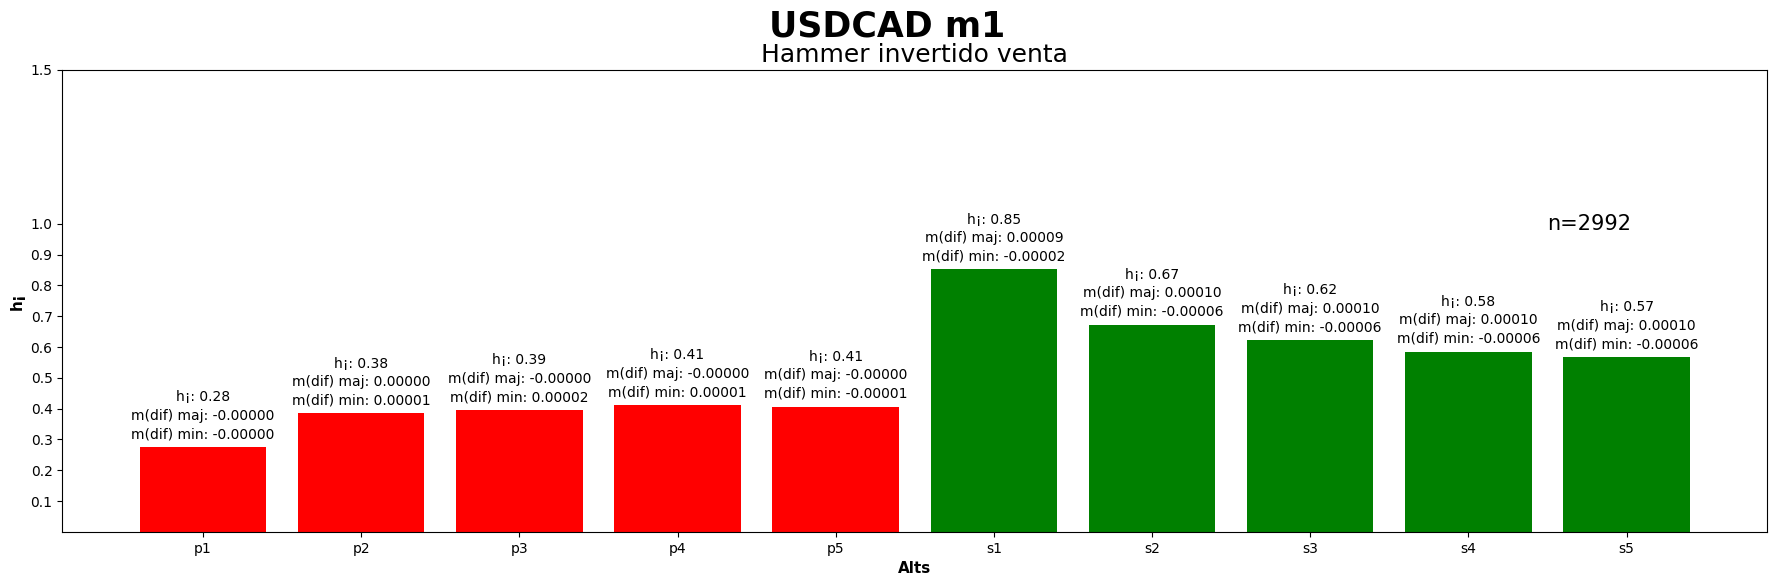

In [149]:
res = filtro['USDCAD']['venta']['Hammer invertido'][filtro['USDCAD']['venta']['Hammer invertido']['temporalidad'] == 'm1'.upper()]
graficar(res, titulo='USDCAD m1', subtitulo='Hammer invertido venta')